# Análisis Exploratorio de Datos: Caracterización Estadística del Riesgo de Diabetes Gestacional (GDM)

**Universidad de Magallanes**  
**Facultad de Ingeniería, Departamento de Ingeniería en Computación**  
**Asignatura:** Matemática para Ciencias de la Computación  
**Profesor:** David Medina Ortiz  

---

**Equipo:** Alma de Litio  
**Estudiante(s):** Pablo Gómez (Líder), Emmanuel Velásquez, Diego Vidal  
**Fecha de entrega:** 12 de noviembre de 2025  

---

## Resumen Ejecutivo

Este informe presenta un análisis exploratorio exhaustivo de un dataset sintético que simula información clínica del primer trimestre del embarazo, con el objetivo de caracterizar estadísticamente los datos y explorar asociaciones entre variables clínicas y el riesgo de desarrollar diabetes gestacional (GDM). El análisis incluye estadística descriptiva, identificación de valores atípicos mediante múltiples métodos (IQR e Isolation Forest), visualizaciones comparativas entre grupos, análisis de correlaciones, pruebas de normalidad, pruebas de hipótesis e intervalos de confianza.

**Resultados principales:**
- Dataset de 1500 registros con 17% de casos positivos de GDM
- Identificación exitosa de outliers mediante sistema de votación (4 métodos)
- Intervalos de confianza para variables clave con interpretación clínica y visualizaciones
- Pruebas de hipótesis completas para comparación de grupos con tablas resumen
- Análisis bivariado completo con correlaciones de Pearson y Spearman por grupo
- Evaluación de normalidad para todas las variables continuas con discusión de impacto
- Comparaciones estadísticas entre grupos GDM+ y GDM- con interpretaciones detalladas

---

# 1. Descripción General del Dataset

## 1.1 Contexto del Estudio

Este trabajo utiliza un **dataset sintético** que simula información clínica recopilada durante el **primer trimestre del embarazo**, diseñado específicamente para el estudio de factores asociados al desarrollo de **diabetes gestacional (GDM)**. El dataset representa un escenario realista de datos clínicos con características propias de la práctica médica, incluyendo valores faltantes y datos atípicos.

La diabetes gestacional es una condición de hiperglucemia que se desarrolla durante el embarazo y puede tener consecuencias significativas tanto para la madre como para el feto. La identificación temprana de factores de riesgo en el primer trimestre permitiría intervenciones preventivas oportunas.

## 1.2 Características del Dataset

### Dimensiones y estructura
- **Tamaño muestral (N)**: Aproximadamente 1500 registros de pacientes embarazadas
- **Variables totales**: 20 variables (19 predictoras + 1 objetivo)
- **Tipos de variables**: Continuas, discretas y categóricas binarias

### Variables incluidas

#### Variables demográficas y antropométricas:
- `age_years`: Edad de la paciente en años
- `bmi_prepreg_kg_m2`: Índice de masa corporal pregestacional (kg/m²)

#### Variables hemodinámicas:
- `systolic_bp_mmHg`: Presión arterial sistólica (mmHg)
- `diastolic_bp_mmHg`: Presión arterial diastólica (mmHg)
- `map_mmHg`: Presión arterial media (mmHg)

#### Variables metabólicas y bioquímicas:
- `fpg_mmol_l`: Glucosa plasmática en ayunas (mmol/L)
- `hba1c_percent`: Hemoglobina glicosilada (%)
- `insulin_uIU_ml`: Insulina sérica (μIU/mL)
- `homa_ir`: Índice HOMA-IR (resistencia a la insulina)
- `triglycerides_mmol_l`: Triglicéridos séricos (mmol/L)
- `hdl_mmol_l`: Colesterol HDL (mmol/L)

#### Variables obstétricas y de antecedentes:
- `gestational_weeks`: Semanas de gestación al momento de la medición
- `parity`: Paridad (número de embarazos previos)
- `previous_gdm`: Antecedente de diabetes gestacional previa (0/1)
- `family_history_t2d`: Antecedentes familiares de diabetes tipo 2 (0/1)

#### Variables de condiciones preexistentes:
- `pcos`: Diagnóstico de síndrome de ovario poliquístico (0/1)

#### Variables de estilo de vida:
- `smoking_first_trimester`: Tabaquismo durante el primer trimestre (0/1)
- `physical_activity_level`: Nivel de actividad física (escala ordinal)
- `diet_score_0_100`: Puntuación de calidad dietética (0-100)

#### Variable objetivo:
- `label_gdm`: Diagnóstico de diabetes gestacional (0 = No GDM, 1 = GDM)

## 1.3 Características Especiales del Dataset

### Datos faltantes (Missing Data)
El dataset presenta valores faltantes con dos patrones principales:
- **MCAR (Missing Completely At Random)**: Ausencia de datos sin relación con otras variables
- **MAR (Missing At Random)**: Valores faltantes relacionados con otras variables observadas

### Valores atípicos (Outliers)
Se observa la presencia de valores extremos en diversas variables que requieren:
- Identificación sistemática mediante múltiples métodos
- Evaluación de su naturaleza (error vs variabilidad biológica)
- Tratamiento apropiado antes de análisis inferenciales

### Desbalance de clases
- **Proporción de casos positivos**: Aproximadamente 17% (prevalencia realista de GDM)
- **Proporción de casos negativos**: 83%
- Este desbalance refleja la prevalencia real de GDM en poblaciones de riesgo moderado

## 1.4 Objetivos del Análisis

### Objetivo general
Realizar un análisis exploratorio exhaustivo que permita caracterizar estadísticamente el dataset y comprender las relaciones entre variables clínicas y el riesgo de diabetes gestacional.

### Objetivos específicos
1. **Caracterizar la distribución** de todas las variables del dataset mediante estadística descriptiva
2. **Identificar y tratar valores atípicos** utilizando métodos robustos y complementarios
3. **Detectar patrones y asociaciones** entre variables mediante análisis bivariado
4. **Comparar grupos** (GDM+ vs GDM-) mediante pruebas de hipótesis apropiadas
5. **Evaluar supuestos estadísticos** (normalidad, homocedasticidad) para justificar elección de tests
6. **Calcular intervalos de confianza** para estimar parámetros poblacionales
7. **Generar insights clínicos** relevantes para la comprensión del riesgo de GDM

---

# 2. Metodología y Resultados

Esta sección presenta el desarrollo metodológico y los resultados obtenidos, organizado según las actividades especificadas en la guía práctica. Cada subsección incluye la justificación metodológica, el código implementado, los resultados obtenidos y su interpretación preliminar.

---

## 2. Desarrollo del Análisis

### 2.1 Análisis Exploratorio de Datos (EDA)

En esta sección se realiza un análisis exhaustivo del dataset que incluye:

1. **Carga y exploración inicial**: Verificación de dimensiones, tipos de datos, y estructura general
2. **Análisis de valores faltantes**: Detección y cuantificación de datos ausentes
3. **Estadística descriptiva**: Medidas de tendencia central y dispersión para todas las variables
4. **Detección de outliers**: Implementación de múltiples métodos para identificar valores atípicos
5. **Visualizaciones**: Histogramas, boxplots y gráficos de densidad para análisis comparativo

#### Metodología de detección de outliers

El análisis implementa un sistema robusto de votación basado en cuatro métodos complementarios:

- **Método IQR (Rango Intercuartílico)**: Detección univariada clásica utilizando percentiles 25 y 75
- **Isolation Forest**: Algoritmo no paramétrico efectivo para detectar anomalías en espacios multidimensionales

---

### 2.1.1 Importación de Librerías

Se cargan las librerías necesarias para el análisis estadístico, manipulación de datos y visualización.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from auxiliar_functions import *
from sklearn.ensemble import IsolationForest
from scipy import stats

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

### 2.1.2 Carga y Exploración Inicial del Dataset

Se realiza la carga del archivo CSV y se inspeccionan las primeras observaciones, dimensiones y estructura general de los datos.

In [ ]:
# Carga del dataset
df_data = pd.read_csv("gdm_first_trimester_ml_dataset.csv")

# Primeras filas
print("Primeras 5 filas del dataset:")
df_data.head(5)

In [ ]:
# Dimensiones del dataset
print(f"Dimensiones: {df_data.shape}")
print(f"Total de registros: {df_data.shape[0]}")
print(f"Total de variables: {df_data.shape[1]}")
df_data.shape

In [ ]:
# Distribución de la variable objetivo
print("Distribución de GDM:")
print(df_data["label_gdm"].value_counts())
print(f"\nProporción de casos positivos: {df_data['label_gdm'].mean():.2%}")

In [ ]:
# Tipos de datos
print("Tipos de datos por variable:")
df_data.dtypes

In [ ]:
# Exploración de variable categórica: PCOS
# Utilidad: Verificar cuántos valores únicos tiene esta variable binaria (0/1)
# Esto confirma que PCOS es efectivamente una variable dicotómica sin valores anómalos
print("🔍 Exploración de la variable PCOS (Síndrome de Ovario Poliquístico):")
print(f"Valores únicos: {df_data['pcos'].unique()}")
print(f"Número de valores únicos: {df_data['pcos'].unique().shape[0]}")
print("\nDistribución de PCOS:")
print(df_data["pcos"].value_counts())
print(f"\n📊 Proporción de pacientes con PCOS: {df_data['pcos'].mean():.2%}")

### 2.1.3 Análisis de Valores Faltantes

Se cuantifican los valores faltantes (NaN) por variable y se genera un resumen agregado para identificar patrones de datos ausentes.

In [ ]:
df_nulls = df_data.isna().astype(int)
df_summary_null = generate_df_counts(df_nulls, columns_name=["descriptor", "count_Nulls", "count_Falses"])
print("Resumen de valores faltantes:")
df_summary_null

In [ ]:
# Exploración detallada: Visualizar matriz completa de valores faltantes
# Utilidad: Permite inspeccionar visualmente patrones de datos faltantes por registro
# Cada fila representa un paciente, cada columna una variable (1=faltante, 0=presente)
print("📋 Primeras 10 filas de la matriz de valores faltantes:")
print("(1 = dato faltante, 0 = dato presente)\n")
df_nulls.head(10)

### 2.1.4 Estadística Descriptiva

Se calculan medidas de tendencia central, dispersión y posición para todas las variables continuas. Se identifican variables categóricas/binarias que deben excluirse del análisis descriptivo de variables continuas.

In [ ]:
columns_to_ignore = [
    "parity", 
    "family_history_t2d",
    "previous_gdm",
    "pcos", 
    "smoking_first_trimester",
    "label_gdm",
    "physical_activity_level"
]

print("Variables categóricas/binarias a excluir del análisis descriptivo:")
print(columns_to_ignore)

In [ ]:
# Estadística descriptiva para todas las variables
print("Estadísticas descriptivas del dataset completo:")
df_data.describe()

In [ ]:
statistical_descriptors = []

for column in df_data.columns:
    if column not in columns_to_ignore:
        descriptive_values = df_data[column].describe()

        IQR = descriptive_values["75%"] - descriptive_values["25%"]
        min_value, max_value = get_range_outlier(
            descriptive_values["25%"], 
            descriptive_values["75%"], 
            IQR)

        row = {
            "descriptor" : column,
            "mean":descriptive_values["mean"],
            "std" :descriptive_values["std"],
            "median" : descriptive_values["50%"],
            "IQR" : IQR,
            "25%" : descriptive_values["25%"],
            "75%" :descriptive_values["75%"],
            "min_value_for_outlier" : min_value,
            "max_value_for_outlier" : max_value

        }
        statistical_descriptors.append(row)

df_statistical = pd.DataFrame(statistical_descriptors)
print("Estadísticas descriptivas con IQR y umbrales para outliers:")
df_statistical

### 2.1.5 Detección de Valores Atípicos (Outliers)

Se implementa un sistema robusto de detección de outliers mediante 4 métodos complementarios: IQR, Isolation Forest sobre variables categóricas, Isolation Forest sobre variables continuas, e Isolation Forest sobre todas las variables. Se utiliza un sistema de votación para clasificar la severidad de los casos atípicos.

In [ ]:
# Detección de outliers por método IQR
df_outliers = pd.DataFrame()

for column in df_data.columns:
    if column not in columns_to_ignore:
        
        df_filter = df_statistical[df_statistical["descriptor"] == column]
        df_filter.reset_index(inplace=True)

        min_value, max_value = df_filter["min_value_for_outlier"][0], df_filter["max_value_for_outlier"][0]

        df_outliers[column] = df_data[column].apply(lambda x: check_is_outlier(x, min_value, max_value))

print("Detección de outliers por IQR completada")
print(f"Dimensiones de df_outliers: {df_outliers.shape}")

In [ ]:
# Convertir a enteros y generar resumen
df_outliers = df_outliers.astype(int)
df_summary_outlier = generate_df_counts(df_outliers, columns_name=["descriptor", "count_Outlier", "count_NotOutlier"])
print("\nResumen de outliers detectados por IQR:")
df_summary_outlier

In [ ]:
# Agregar columna con conteo de outliers por fila
df_outliers["outlier_by_IQR"] = df_outliers.sum(axis=1)
print("\nDistribución de número de outliers por registro:")
print(df_outliers["outlier_by_IQR"].value_counts().sort_index())

In [ ]:
# Exploración detallada: Ejemplo de detección en una variable específica
# Utilidad: Verificar la correcta aplicación del método IQR en una variable clave
print("🔬 Ejemplo de detección en triglicéridos:")
print("Distribución de outliers (0=normal, 1=outlier):")
print(df_outliers["triglycerides_mmol_l"].value_counts())
print(f"\n⚠️  Registros con triglicéridos atípicos: {df_outliers['triglycerides_mmol_l'].sum()}")
print(f"✓ Registros con triglicéridos normales: {(df_outliers['triglycerides_mmol_l'] == 0).sum()}")

In [ ]:
# Exploración: Verificar estructura del dataframe de outliers
# Utilidad: Confirmar que todas las variables continuas están incluidas en el análisis
print("📋 Columnas incluidas en la detección de outliers:")
print(df_outliers.columns.tolist())
print(f"\n📊 Total de variables analizadas: {len(df_outliers.columns) - 1}")  # -1 por outlier_by_IQR

In [ ]:
# Exploración específica: Casos extremos de paridad
# Utilidad: Identificar valores poco comunes que podrían ser outliers por sí mismos
# La paridad alta (≥5 embarazos) es clínicamente relevante para riesgo de GDM
print("\n🔬 Análisis de casos extremos de paridad:")
paridad_extrema = df_data[df_data["parity"] == 5]
print(f"Registros con paridad = 5: {len(paridad_extrema)}")
if len(paridad_extrema) > 0:
    print("\nPrimeros registros con paridad extrema:")
    print(paridad_extrema[["parity", "age_years", "bmi_prepreg_kg_m2", "label_gdm"]].head())
else:
    print("No hay registros con paridad = 5 en el dataset")

In [ ]:
# Exploración: Análisis de distribución de todas las variables categóricas
# Utilidad: Entender el balance de clases en variables binarias/categóricas
# Esto es crítico antes de aplicar Isolation Forest para detectar combinaciones anómalas
print("📊 DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS/BINARIAS")
print("=" * 70)
for column in columns_to_ignore:
    print(f"\n🔹 {column}:")
    print(df_data[column].value_counts().sort_index())
    if column != "label_gdm":  # No calcular proporción para la etiqueta objetivo
        try:
            prop = df_data[column].mean()
            print(f"   Proporción de casos positivos: {prop:.2%}")
        except:
            pass

#### 2.1.5.1 Exploración de Variables Categóricas

Antes de aplicar Isolation Forest, se examinan las distribuciones de las variables categóricas/binarias para comprender sus balances de clase y posibles combinaciones anómalas.

#### 2.1.5.2 Detección con Isolation Forest

**Isolation Forest** es un algoritmo de aprendizaje no supervisado que identifica anomalías aislando observaciones mediante particiones aleatorias. Se aplican 3 estrategias complementarias:

1. **Solo variables categóricas**: Detecta combinaciones inusuales de factores de riesgo
2. **Solo variables continuas**: Identifica valores extremos en mediciones clínicas
3. **Todas las variables**: Enfoque integral combinando ambos tipos de información

In [ ]:
# 1. Isolation Forest sobre variables categóricas
data_categorical = df_data[columns_to_ignore]
data_categorical = data_categorical.drop(columns=["label_gdm"])

isolation_instance = IsolationForest(random_state=42)
isolation_instance.fit(data_categorical)
data_categorical["is_isolated"] = isolation_instance.predict(data_categorical)

print("Isolation Forest - Solo categóricas:")
print(data_categorical["is_isolated"].value_counts())
print(f"Outliers detectados: {(data_categorical['is_isolated'] == -1).sum()}")

In [ ]:
# Exploración: Visualizar resultados del Isolation Forest en categóricas
# Utilidad: Verificar qué combinaciones de factores de riesgo son consideradas anómalas
# Permite identificar perfiles de pacientes con combinaciones inusuales de características
print("📋 Primeras 10 filas con predicción de anomalía (categóricas):")
print("Valores: 1 = normal, -1 = outlier/anomalía\n")
data_categorical.head(10)

In [ ]:
# 2. Isolation Forest sobre solo valores continuos
df_values = df_data.drop(columns=columns_to_ignore)

isolation_instance = IsolationForest(random_state=42)
isolation_instance.fit(df_values)
df_values["is_isolated"] = isolation_instance.predict(df_values)

print("\nIsolation Forest - Solo continuas:")
print(df_values["is_isolated"].value_counts())
print(f"Outliers detectados: {(df_values['is_isolated'] == -1).sum()}")

In [ ]:
# 3. Isolation Forest sobre todas las variables (excepto label_gdm)
df_values_cat = df_data.drop(columns=["label_gdm"])

isolation_instance = IsolationForest(random_state=42)
isolation_instance.fit(df_values_cat)
df_values_cat["is_isolated"] = isolation_instance.predict(df_values_cat)

print("\nIsolation Forest - Todas las variables:")
print(df_values_cat["is_isolated"].value_counts())
print(f"Outliers detectados: {(df_values_cat['is_isolated'] == -1).sum()}")

#### 2.1.5.3 Sistema de Votación para Clasificación de Outliers

Se implementa un sistema de votación que combina los 4 métodos de detección:

1. **IQR** (rango intercuartílico)
2. **Isolation Forest sobre categóricas**
3. **Isolation Forest sobre continuas**
4. **Isolation Forest sobre todas las variables**

**Interpretación del sistema de votos:**
- **0 votos**: Registro normal según todos los métodos
- **1-2 votos**: Posible outlier leve (se conserva)
- **3 votos**: Outlier moderado (se elimina)
- **4 votos**: Outlier extremo (se elimina)

Este enfoque conservador elimina solo casos extremos, preservando la variabilidad biológica natural del dataset.

In [ ]:
# Agregar columnas de detección de outliers al dataframe principal
df_data["is_outlier_by_IQR"] = df_outliers["outlier_by_IQR"].values
df_data["is_outlier_by_IF_all"] = df_values_cat["is_isolated"].values
df_data["is_outlier_by_IF_just_values"] = df_values["is_isolated"].values
df_data["is_outlier_by_IF_just_cat"] = data_categorical["is_isolated"].values

print("Columnas de detección agregadas al dataframe principal")
print(f"Nuevas columnas: {['is_outlier_by_IQR', 'is_outlier_by_IF_all', 'is_outlier_by_IF_just_values', 'is_outlier_by_IF_just_cat']}")

In [ ]:
# Exploración: Verificar integración de métodos de detección en el dataframe principal
# Utilidad: Confirmar que todas las columnas de detección se agregaron correctamente
# y que el dataframe mantiene su integridad estructural
print("📋 Verificación de integración de métodos de detección:")
print(f"Dimensiones del dataframe: {df_data.shape}")
print(f"\n🔍 Nuevas columnas agregadas:")
detection_cols = ['is_outlier_by_IQR', 'is_outlier_by_IF_all', 'is_outlier_by_IF_just_values', 'is_outlier_by_IF_just_cat']
for col in detection_cols:
    if col in df_data.columns:
        print(f"  ✓ {col}")
print("\n📊 Primeras 5 filas con columnas de detección:")
df_data[detection_cols].head()

In [ ]:
# Categorizar IQR: convertir conteo a binario (0 = no outlier, 1 = outlier)
df_data["is_outlier_by_IQR"] = df_data["is_outlier_by_IQR"].apply(categorize_iqr)

print("\nDistribución de outliers por IQR (categorizado):")
print(df_data["is_outlier_by_IQR"].value_counts())

In [ ]:
# Remapear valores de Isolation Forest: 1 (normal) → 0, -1 (outlier) → 1
for column in ["is_outlier_by_IF_all", "is_outlier_by_IF_just_values", "is_outlier_by_IF_just_cat"]:
    df_data[column] = df_data[column].replace({1:0, -1:1})

print("\nValores de Isolation Forest remapeados:")
print("  1 (normal) → 0 (no outlier)")
print("  -1 (anomalía) → 1 (outlier)")
print("\nDistribución de outliers por IF (todas las variables):")
print(df_data["is_outlier_by_IF_all"].value_counts())

In [ ]:
# Sistema de votación: sumar los 4 métodos (valores de 0 a 4)
df_data["vote_outlier"] = df_data[["is_outlier_by_IF_all", "is_outlier_by_IF_just_values", 
                                     "is_outlier_by_IF_just_cat", "is_outlier_by_IQR"]].sum(axis=1)

print("\n📊 Distribución de votos de outliers:")
print(df_data["vote_outlier"].value_counts().sort_index())
print(f"\n🔍 Registros identificados como outliers por los 4 métodos: {(df_data['vote_outlier'] == 4).sum()}")
print(f"⚠️  Registros identificados como outliers por 3+ métodos: {(df_data['vote_outlier'] >= 3).sum()}")

In [ ]:
# Exploración detallada: Análisis de casos con máxima votación de outliers
# Utilidad: Identificar qué características tienen los registros más anómalos
# Estos son candidatos muy fuertes a ser outliers verdaderos que deben eliminarse
print("🔬 ANÁLISIS DE CASOS EXTREMOS (vote_outlier = 4):")
print("=" * 70)
casos_extremos = df_data[df_data["vote_outlier"] == 4]
if len(casos_extremos) > 0:
    print(f"Total de casos identificados por los 4 métodos: {len(casos_extremos)}")
    print("\n📊 Muestra de registros extremos:")
    # Mostrar algunas variables clave para entender por qué son outliers
    cols_interes = ["age_years", "bmi_prepreg_kg_m2", "fpg_mmol_l", "hba1c_percent", 
                    "parity", "label_gdm", "vote_outlier"]
    print(casos_extremos[cols_interes].head(10))
else:
    print("✓ No hay registros identificados como outliers por los 4 métodos simultáneamente")

#### 2.1.5.4 Filtrado de Outliers y Creación del Dataset Limpio

**Criterio de filtrado:** Se eliminan registros identificados como outliers por **3 o más métodos** (vote_outlier ≥ 3).

**Justificación:** Esta estrategia conservadora elimina solo los casos más extremos, preservando la mayor parte de los datos para análisis posteriores y manteniendo la representatividad de la variabilidad clínica real.

El dataset resultante (`df_filter`) se utilizará en todos los análisis subsecuentes.

In [ ]:
# Filtrar outliers: mantener solo registros con vote_outlier < 3
df_filter = df_data[df_data["vote_outlier"] < 3].copy()

print(f"✅ Dataset filtrado creado: df_filter")
print(f"📊 Dimensiones originales: {df_data.shape}")
print(f"📊 Dimensiones filtradas: {df_filter.shape}")
print(f"🗑️  Registros eliminados: {df_data.shape[0] - df_filter.shape[0]} ({((df_data.shape[0] - df_filter.shape[0]) / df_data.shape[0] * 100):.2f}%)")
print(f"\n✓ Variable crítica 'df_filter' creada exitosamente para análisis posteriores")

### 2.1.6 Visualización Comparativa por Grupo GDM

Se generan visualizaciones exploratorias para todas las variables continuas, comparando las distribuciones entre pacientes con diabetes gestacional (GDM+) y sin ella (GDM-). Se utilizan tres tipos complementarios de gráficos para capturar diferentes aspectos de las distribuciones.

In [ ]:
# Histogramas con KDE para todas las variables continuas (3x5 subplots)
_, axis = plt.subplots(3, 5, figsize=(12, 8))

index = 1
i = 0
j = 0

for column in df_statistical["descriptor"].values:
    sns.histplot(
        data=df_filter, 
        x=column, 
        stat="count",
        fill=False, 
        kde=True, 
        hue="label_gdm", 
        ax=axis[i][j])
    
    axis[i][j].set_xlabel(column, fontsize=8)
    axis[i][j].set_ylabel("Count", fontsize=8)
    axis[i][j].tick_params(labelsize=7)

    if index % 5 == 0:
        i += 1
        j = 0
    else:
        j += 1
    
    index += 1

plt.suptitle("Distribución de Variables Continuas por Grupo GDM (Histogramas + KDE)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Boxplots para todas las variables continuas (3x5 subplots)
_, axis = plt.subplots(3, 5, figsize=(12, 8))

index = 1
i = 0
j = 0

for column in df_statistical["descriptor"].values:
    sns.boxplot(
        data=df_filter, 
        x=column, 
        fill=False, 
        hue="label_gdm", 
        ax=axis[i][j])
    
    axis[i][j].set_xlabel(column, fontsize=8)
    axis[i][j].tick_params(labelsize=7)

    if index % 5 == 0:
        i += 1
        j = 0
    else:
        j += 1
    
    index += 1

plt.suptitle("Comparación de Distribuciones por Grupo GDM (Boxplots)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Violinplots para todas las variables continuas (3x5 subplots)
_, axis = plt.subplots(3, 5, figsize=(12, 8))

index = 1
i = 0
j = 0

for column in df_statistical["descriptor"].values:
    sns.violinplot(
        data=df_filter, 
        x=column, 
        fill=False, 
        hue="label_gdm", 
        ax=axis[i][j])
    
    axis[i][j].set_xlabel(column, fontsize=8)
    axis[i][j].tick_params(labelsize=7)

    if index % 5 == 0:
        i += 1
        j = 0
    else:
        j += 1
    
    index += 1

plt.suptitle("Distribución y Densidad por Grupo GDM (Violinplots)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 2.2 Intervalos de Confianza

### Introducción

Los intervalos de confianza permiten estimar rangos plausibles para parámetros poblacionales (media, varianza) a partir de la muestra observada. En el contexto clínico, estos intervalos proporcionan información sobre la precisión de nuestras estimaciones y permiten comparar valores observados con rangos de referencia establecidos.

### Metodología

Se calculan intervalos de confianza al 95% para:
- **Media (μ)**: Utilizando la distribución t de Student
- **Varianza (σ²)**: Utilizando la distribución chi-cuadrado

Se evalúa el efecto del tamaño muestral (n) sobre la amplitud de los intervalos, variando n desde 10 hasta 100 observaciones.

---

### 2.2.1 Exploración Metodológica de Intervalos de Confianza

Esta sección documenta el proceso evolutivo del análisis de intervalos de confianza, desde una exploración inicial con submuestras hasta el enfoque final con la muestra completa.

#### Exploración Inicial: Análisis con Submuestras

Inicialmente se realizó un análisis exploratorio de cómo variaban los intervalos de confianza en función del tamaño muestral, utilizando submuestras aleatorias de diferentes tamaños (n = 10 a 100). Este enfoque permitió observar la relación entre el tamaño de la muestra y la amplitud de los intervalos.

**Código exploratorio original (posee posibles sesgos):**

In [ ]:
n = np.linspace(10, 100, 10)  # Tamaños de muestra de 10 a 100
print("Tamaños de muestra a evaluar:")
print(n)

nro_tamanhos = n.size
np.random.seed(42)

# Intervalos de confianza
for i in range(0, nro_tamanhos):
    df_mini = pd.DataFrame()
    picked_up_indexs = []
    index = None

    for j in range(0, int(n[i])):    
        while index in picked_up_indexs:
            index = np.random.randint(0, df_data.shape[0])
            df_mini = pd.concat([df_mini, df_data.iloc[[index]]])
        picked_up_indexs.append(index)
    
    # Intervalos de confianza para variables clave
    interesting_descriptors_names = ["bmi_prepreg_kg_m2", "fpg_mmol_l", "hba1c_percent"]

    for descriptor_name in interesting_descriptors_names:
        descriptor = df_mini[descriptor_name]
        descriptor_mean = descriptor.mean()
        descriptor_std = descriptor.std()
        IC_mean = calculate_ic_mean(descriptor_mean, descriptor_std, int(n[i]))
        IC_std = calculate_ic_std(descriptor_std, int(n[i]))
        print(f"Para n={int(n[i])} el intervalo de confianza para la media (μ) del descriptor '{descriptor_name}' es [{IC_mean[0]:.4f}, {IC_mean[1]:.4f}]")
        print(f"Para n={int(n[i])} el intervalo de confianza para la varianza (σ²) del descriptor '{descriptor_name}' es [{IC_std[0]:.4f}, {IC_std[1]:.4f}]")
    
    print()

#### Cambio Metodológico: Transición a Muestra Completa

**Justificación del cambio:** Tras el análisis exploratorio con submuestras, se identificó que este enfoque podía introducir **sesgos de muestreo indeseados**. Los intervalos de confianza calculados sobre submuestras aleatorias pueden variar significativamente según la muestra seleccionada, lo que compromete la reproducibilidad y validez de las estimaciones.

**Decisión metodológica:** Se optó por reemplazar el enfoque de submuestreo por el cálculo de intervalos de confianza sobre la **muestra completa**, comparando:
1. Dataset completo (con outliers)
2. Dataset filtrado (sin outliers extremos)

Este enfoque proporciona estimaciones más robustas y representativas de los parámetros poblacionales, eliminando la variabilidad artificial introducida por el muestreo aleatorio repetido.

---

### 2.2.2 Intervalos de Confianza sobre Muestra Completa

Se calculan intervalos de confianza (95%) para la media (μ) y la varianza (σ²) de variables clínicas clave, comparando el dataset completo con el dataset filtrado (sin outliers extremos).

In [ ]:

n_full = df_data.shape[0]
n_without_outliers = df_filter.shape[0]

interesting_descriptors_names = ["bmi_prepreg_kg_m2", "fpg_mmol_l", "hba1c_percent"]
number_of_descriptors_analyzed = 0

for descriptor_name in interesting_descriptors_names:
    print("\nINTERVALOS DE CONFIANZA PARA " + interesting_descriptors_names[number_of_descriptors_analyzed].upper() + "\n")
    descriptor_full_data = df_data[descriptor_name]
    descriptor_full_data_mean = descriptor_full_data.mean()
    descriptor_full_data_std = descriptor_full_data.std()
    full_IC_mean = calculate_ic_mean(descriptor_full_data_mean, descriptor_full_data_std, n_full)
    full_IC_std = calculate_ic_std(descriptor_full_data_std, n_full)
    descriptor_parcial_data = df_filter[descriptor_name]
    descriptor_parcial_data_mean = descriptor_parcial_data.mean()
    descriptor_parcial_data_std = descriptor_parcial_data.std()
    parcial_IC_mean = calculate_ic_mean(descriptor_parcial_data_mean, descriptor_parcial_data_std, n_without_outliers)
    parcial_IC_std = calculate_ic_std(descriptor_parcial_data_std, n_without_outliers)
    
    print("CON OUTLIERS INCLUIDOS:")
    print(f"- El intervalo de confianza para la media (μ) del descriptor '{descriptor_name}' es [{full_IC_mean[0]:.4f}, {full_IC_mean[1]:.4f}]")
    print(f"- El intervalo de confianza para la varianza (σ²) del descriptor '{descriptor_name}' es [{full_IC_std[0]:.4f}, {full_IC_std[1]:.4f}]")
    print("\nSIN LOS OUTLIERS INCLUIDOS:")
    print(f"- El intervalo de confianza para la media (μ) del descriptor '{descriptor_name}' es [{parcial_IC_mean[0]:.4f}, {parcial_IC_mean[1]:.4f}]")
    print(f"- El intervalo de confianza para la varianza (σ²) del descriptor '{descriptor_name}' es [{parcial_IC_std[0]:.4f}, {parcial_IC_std[1]:.4f}]")

    number_of_descriptors_analyzed += 1

## 2.2 Intervalos de Confianza

### 2.2.1 Introducción

Los intervalos de confianza (IC) permiten estimar rangos plausibles para parámetros poblacionales a partir de datos muestrales. En este análisis se calculan IC del 95% para medias de variables clave y para diferencias entre grupos GDM+ y GDM-.

### 2.2.2 Intervalos de Confianza para Variables Clave

Se calculan intervalos de confianza para las medias de IMC pregestacional, glucosa en ayunas (FPG) y hemoglobina glicosilada (HbA1c), tanto globalmente como por grupo GDM.

In [ ]:
# Cálculo de intervalos de confianza para variables clave
import numpy as np
from scipy import stats

# Variables a analizar
variables_ic = ['bmi_prepreg_kg_m2', 'fpg_mmol_l', 'hba1c_percent']

print("=" * 80)
print("INTERVALOS DE CONFIANZA AL 95% PARA VARIABLES CLAVE")
print("=" * 80)

for var in variables_ic:
    print(f"\n{'='*80}")
    print(f"VARIABLE: {var}")
    print(f"{'='*80}")
    
    # Datos globales
    data_global = df_filter[var].dropna()
    n_global = len(data_global)
    mean_global = data_global.mean()
    std_global = data_global.std(ddof=1)
    
    # IC global usando función de auxiliar_functions
    ic_global = calculate_ic_mean(mean_global, std_global, n_global, trust_level=0.95)
    
    print(f"\n📊 GLOBAL (todos los pacientes):")
    print(f"   n = {n_global}")
    print(f"   Media = {mean_global:.4f}")
    print(f"   Desv. Est. = {std_global:.4f}")
    print(f"   IC 95% = ({ic_global[0]:.4f}, {ic_global[1]:.4f})")
    
    # Datos por grupo
    data_gdm_neg = df_filter[df_filter['label_gdm'] == 0][var].dropna()
    data_gdm_pos = df_filter[df_filter['label_gdm'] == 1][var].dropna()
    
    n0 = len(data_gdm_neg)
    mean0 = data_gdm_neg.mean()
    std0 = data_gdm_neg.std(ddof=1)
    ic0 = calculate_ic_mean(mean0, std0, n0, trust_level=0.95)
    
    n1 = len(data_gdm_pos)
    mean1 = data_gdm_pos.mean()
    std1 = data_gdm_pos.std(ddof=1)
    ic1 = calculate_ic_mean(mean1, std1, n1, trust_level=0.95)
    
    print(f"\n📊 GDM- (Sin diabetes gestacional):")
    print(f"   n = {n0}")
    print(f"   Media = {mean0:.4f}")
    print(f"   Desv. Est. = {std0:.4f}")
    print(f"   IC 95% = ({ic0[0]:.4f}, {ic0[1]:.4f})")
    
    print(f"\n📊 GDM+ (Con diabetes gestacional):")
    print(f"   n = {n1}")
    print(f"   Media = {mean1:.4f}")
    print(f"   Desv. Est. = {std1:.4f}")
    print(f"   IC 95% = ({ic1[0]:.4f}, {ic1[1]:.4f})")
    
    # Diferencia de medias
    diff_mean = mean1 - mean0
    
    # Calcular IC para diferencia usando fórmula manual
    # Primero verificar homogeneidad de varianzas con Levene
    _, p_levene = stats.levene(data_gdm_neg, data_gdm_pos)
    equal_var = p_levene >= 0.05
    
    if equal_var:
        # Varianza combinada
        pooled_var = ((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2)
        se_diff = np.sqrt(pooled_var * (1/n0 + 1/n1))
        df_diff = n0 + n1 - 2
    else:
        # Aproximación de Welch
        se_diff = np.sqrt(std0**2/n0 + std1**2/n1)
        df_diff = (std0**2/n0 + std1**2/n1)**2 / ((std0**4/(n0**2*(n0-1))) + (std1**4/(n1**2*(n1-1))))
    
    t_crit = stats.t.ppf(0.975, df_diff)
    margin = t_crit * se_diff
    ic_diff = (diff_mean - margin, diff_mean + margin)
    
    print(f"\n📊 DIFERENCIA DE MEDIAS (GDM+ - GDM-):")
    print(f"   Diferencia = {diff_mean:.4f}")
    print(f"   IC 95% = ({ic_diff[0]:.4f}, {ic_diff[1]:.4f})")
    print(f"   Varianzas homogéneas: {'Sí' if equal_var else 'No'} (p-Levene = {p_levene:.4f})")
    
    # Verificar normalidad
    _, p_shapiro0 = stats.shapiro(data_gdm_neg) if len(data_gdm_neg) < 5000 else (None, 1.0)
    _, p_shapiro1 = stats.shapiro(data_gdm_pos) if len(data_gdm_pos) < 5000 else (None, 1.0)
    
    if p_shapiro0 < 0.05 or p_shapiro1 < 0.05:
        print(f"\n   ⚠️  Advertencia: Al menos un grupo no cumple normalidad")
        print(f"      p-Shapiro GDM-: {p_shapiro0:.4f}")
        print(f"      p-Shapiro GDM+: {p_shapiro1:.4f}")
        
        # Calcular IC percentílicos como alternativa
        ic_percentile_0 = (np.percentile(data_gdm_neg, 2.5), np.percentile(data_gdm_neg, 97.5))
        ic_percentile_1 = (np.percentile(data_gdm_pos, 2.5), np.percentile(data_gdm_pos, 97.5))
        
        print(f"\n   📊 IC PERCENTÍLICO (GDM-): ({ic_percentile_0[0]:.4f}, {ic_percentile_0[1]:.4f})")
        print(f"   📊 IC PERCENTÍLICO (GDM+): ({ic_percentile_1[0]:.4f}, {ic_percentile_1[1]:.4f})")

print(f"\n{'='*80}")
print("✅ Intervalos de confianza calculados exitosamente")
print(f"{'='*80}")

### 2.2.3 Interpretación Clínica de los Intervalos de Confianza

#### IMC Pregestacional (bmi_prepreg_kg_m2)

El intervalo de confianza del 95% para la diferencia de medias entre grupos GDM+ y GDM- **no incluye el cero**, lo que indica una diferencia estadísticamente significativa. Las mujeres con diabetes gestacional presentan en promedio aproximadamente 1 kg/m² más que aquellas sin la condición. Este hallazgo es clínicamente relevante, ya que el IMC pregestacional elevado es un factor de riesgo bien establecido para el desarrollo de GDM.

#### Glucosa Plasmática en Ayunas (fpg_mmol_l)

El IC 95% para la diferencia de medias muestra que las pacientes con GDM tienen valores de glucosa en ayunas aproximadamente 0.3 mmol/L más altos que las pacientes sin GDM. Esta diferencia, aunque pequeña en magnitud absoluta, es estadísticamente significativa (el IC no incluye el cero) y clínicamente importante, reflejando el estado de hiperglucemia característico del inicio de la diabetes gestacional.

**Nota importante:** Debido a que la prueba de Shapiro-Wilk indica que los datos no siguen una distribución normal estricta, se proporcionaron también intervalos de confianza percentílicos que no requieren el supuesto de normalidad. Estos intervalos alternativos corroboran los hallazgos obtenidos con el método paramétrico.

#### Hemoglobina Glicosilada (hba1c_percent)

El intervalo de confianza para la diferencia de medias de HbA1c muestra una diferencia pequeña entre grupos. Si bien el análisis descriptivo sugiere valores ligeramente superiores en el grupo GDM+, la magnitud de la diferencia es menor comparada con las otras variables. La HbA1c refleja el control glicémico de los últimos 2-3 meses, por lo que en el primer trimestre aún puede no mostrar diferencias marcadas.

#### Conclusiones sobre Intervalos de Confianza

1. **IMC y FPG son marcadores diferenciadores claros:** Los IC para las diferencias de medias de estas variables no incluyen el cero, confirmando diferencias significativas entre grupos.

2. **Confiabilidad de las estimaciones:** Los IC del 95% proporcionan rangos plausibles para los valores poblacionales, permitiendo cuantificar la incertidumbre asociada a nuestras estimaciones puntuales.

3. **Relevancia del método no paramétrico:** Dado que varias variables no cumplen estrictamente el supuesto de normalidad, los IC percentílicos complementan el análisis y refuerzan las conclusiones.

---

In [ ]:
# Visualización de Intervalos de Confianza para Variables Clave
import matplotlib.pyplot as plt
import numpy as np

# Preparar datos para visualización
variables_viz = ['bmi_prepreg_kg_m2', 'fpg_mmol_l', 'hba1c_percent']
nombres_viz = ['IMC Pregestacional\n(kg/m²)', 'Glucosa en Ayunas\n(mmol/L)', 'HbA1c\n(%)']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (var, nombre) in enumerate(zip(variables_viz, nombres_viz)):
    ax = axes[idx]
    
    # Datos por grupo
    data_neg = df_filter[df_filter['label_gdm'] == 0][var].dropna()
    data_pos = df_filter[df_filter['label_gdm'] == 1][var].dropna()
    
    # Calcular estadísticas
    mean_neg = data_neg.mean()
    mean_pos = data_pos.mean()
    std_neg = data_neg.std(ddof=1)
    std_pos = data_pos.std(ddof=1)
    n_neg = len(data_neg)
    n_pos = len(data_pos)
    
    # Calcular IC
    ic_neg = calculate_ic_mean(mean_neg, std_neg, n_neg)
    ic_pos = calculate_ic_mean(mean_pos, std_pos, n_pos)
    
    # Graficar
    grupos = ['GDM-\n(Sin DG)', 'GDM+\n(Con DG)']
    medias = [mean_neg, mean_pos]
    ic_lower = [ic_neg[0], ic_pos[0]]
    ic_upper = [ic_neg[1], ic_pos[1]]
    
    # Barras con medias
    bars = ax.bar(grupos, medias, alpha=0.7, color=['green', 'red'], edgecolor='black', linewidth=1.5)
    
    # Intervalos de confianza
    for i, (lower, upper, media) in enumerate(zip(ic_lower, ic_upper, medias)):
        ax.plot([i, i], [lower, upper], color='black', linewidth=2.5, marker='_', markersize=15)
    
    # Etiquetas y formato
    ax.set_ylabel('Valor', fontsize=11, fontweight='bold')
    ax.set_title(f'{nombre}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([min(ic_lower) * 0.95, max(ic_upper) * 1.05])
    
    # Añadir valores en texto
    for i, (media, lower, upper) in enumerate(zip(medias, ic_lower, ic_upper)):
        ax.text(i, media, f'{media:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        ax.text(i, upper, f'{upper:.2f}', ha='center', va='bottom', fontsize=8, color='gray')
        ax.text(i, lower, f'{lower:.2f}', ha='center', va='top', fontsize=8, color='gray')

plt.suptitle('Intervalos de Confianza 95% para Variables Clave por Grupo GDM', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ Visualización de intervalos de confianza completada")
print("\n📊 Interpretación:")
print("  • Las barras muestran las medias muestrales")
print("  • Las líneas verticales negras representan los IC del 95%")
print("  • Si los IC no se superponen, hay evidencia de diferencia significativa")
print("\n🔍 Observación:")
for var, nombre in zip(variables_viz, nombres_viz):
    data_neg = df_filter[df_filter['label_gdm'] == 0][var].dropna()
    data_pos = df_filter[df_filter['label_gdm'] == 1][var].dropna()
    ic_neg = calculate_ic_mean(data_neg.mean(), data_neg.std(ddof=1), len(data_neg))
    ic_pos = calculate_ic_mean(data_pos.mean(), data_pos.std(ddof=1), len(data_pos))
    
    # Verificar superposición
    if ic_neg[1] < ic_pos[0] or ic_pos[1] < ic_neg[0]:
        print(f"  ✓ {nombre.replace(chr(10), ' ')}: IC no se superponen → Diferencia significativa")
    else:
        print(f"  ✗ {nombre.replace(chr(10), ' ')}: IC se superponen → Diferencia no clara")

---

## 2.3 Pruebas de Hipótesis

### Introducción

Las pruebas de hipótesis permiten evaluar afirmaciones sobre parámetros poblacionales mediante el análisis de evidencia muestral. En este estudio, se comparan grupos (GDM+ vs GDM-) y se evalúan asociaciones entre variables categóricas y el riesgo de diabetes gestacional.

Las pruebas de hipótesis permiten evaluar formalmente si las diferencias observadas entre grupos son estadísticamente significativas o pueden atribuirse al azar. En esta sección se realizan comparaciones entre grupos GDM+ y GDM- para variables continuas y categóricas, verificando los supuestos estadísticos necesarios para cada prueba.

### Metodología

Para cada comparación se sigue el siguiente protocolo:

1. **Formulación de hipótesis**: Definición clara de H₀ (hipótesis nula) y H₁ (hipótesis alternativa)
2. **Verificación de supuestos**:
   - Normalidad por grupo (prueba de Shapiro-Wilk)
   - Homogeneidad de varianzas (prueba de Levene)
3. **Selección de prueba apropiada**:
   - **t de Student**: Si se cumplen normalidad y homocedasticidad
   - **Welch t-test**: Si se cumple normalidad pero no homocedasticidad
   - **Mann-Whitney U**: Si no se cumple normalidad (alternativa no paramétrica)
4. **Interpretación de resultados**: Decisión sobre H₀ y significancia clínica

---

### 2.3.1 Comparación de Variables Continuas entre Dos Grupos

Se comparan variables continuas clave entre pacientes con y sin diabetes gestacional. Para cada variable, se verifica la normalidad (Shapiro-Wilk) y la homocedasticidad (Levene), y se selecciona la prueba apropiada:

- **Prueba t de Student:** Si se cumplen normalidad y homocedasticidad
- **Prueba U de Mann-Whitney:** Si no se cumple normalidad (método no paramétrico)

A continuación se presenta un ejemplo de comparación de presión arterial entre grupos, utilizando la función implementada que verifica supuestos y selecciona automáticamente la prueba estadística apropiada.

In [ ]:
def compare_two_groups_numeric(df, y_col, group_col="label_gdm", alpha=0.05, tail="two-sided"):
    """
    Compara una variable numérica (y_col) entre dos grupos binarios (group_col).
    Verifica supuestos: normalidad por grupo (Shapiro) y homogeneidad (Levene).
    Decide automáticamente entre:
      - t de Student clásico (varianzas iguales)
      - Welch t-test (varianzas desiguales)
      - Mann–Whitney U (si falla normalidad)
    Retorna un dict con todo lo necesario para el informe.
    """
    d = df[[y_col, group_col]].dropna()
    g0 = d[d[group_col] == 0][y_col].astype(float).values
    g1 = d[d[group_col] == 1][y_col].astype(float).values

    # Hipótesis
    H0 = f"μ_{y_col}|GDM=0 == μ_{y_col}|GDM=1"
    H1 = f"μ_{y_col}|GDM=0 != μ_{y_col}|GDM=1" if tail=="two-sided" else f"μ diferencias unilaterales ({tail})"

    # Normalidad por grupo (solo si n>=3)
    sh0 = stats.shapiro(g0) if len(g0) >= 3 else (np.nan, np.nan)
    sh1 = stats.shapiro(g1) if len(g1) >= 3 else (np.nan, np.nan)
    normal_ok = (not np.isnan(sh0[1]) and sh0[1] > alpha) and (not np.isnan(sh1[1]) and sh1[1] > alpha)

    # Homogeneidad de varianzas (Levene)
    lev = stats.levene(g0, g1, center='median')
    equal_var = lev.pvalue > alpha

    # Elección de prueba
    if normal_ok:
        res = stats.ttest_ind(g0, g1, equal_var=equal_var, alternative="two-sided")
        test_name = "t-test (Welch)" if not equal_var else "t-test (varianzas iguales)"
        stat, p = res.statistic, res.pvalue
    else:
        res = stats.mannwhitneyu(g0, g1, alternative="two-sided")
        test_name = "Mann–Whitney U"
        stat, p = res.statistic, res.pvalue

    decision = "Rechazo H0" if p < alpha else "No rechazo H0"

    return {
        "variable": y_col,
        "n_gdm0": len(g0), "mean_gdm0": np.mean(g0), "sd_gdm0": np.std(g0, ddof=1),
        "n_gdm1": len(g1), "mean_gdm1": np.mean(g1), "sd_gdm1": np.std(g1, ddof=1),
        "shapiro_g0_p": (np.nan if np.isnan(sh0[1]) else sh0[1]),
        "shapiro_g1_p": (np.nan if np.isnan(sh1[1]) else sh1[1]),
        "levene_p": lev.pvalue,
        "test": test_name, "stat": stat, "p_value": p,
        "alpha": alpha, "decision": decision,
        "H0": H0, "H1": H1
    }

# Función para comparar dos grupos en variables continuas
def compare_two_groups(df, var, group_col='label_gdm', alpha=0.05):
    """
    Compara una variable continua entre dos grupos (GDM+ vs GDM-).
    Verifica supuestos y selecciona la prueba apropiada.
    
    Retorna un diccionario con resultados.
    """
    # Extraer datos por grupo
    group0 = df[df[group_col] == 0][var].dropna()
    group1 = df[df[group_col] == 1][var].dropna()
    
    n0, n1 = len(group0), len(group1)
    mean0, mean1 = group0.mean(), group1.mean()
    std0, std1 = group0.std(ddof=1), group1.std(ddof=1)
    
    # Prueba de normalidad (Shapiro-Wilk)
    _, p_norm0 = stats.shapiro(group0) if n0 >= 3 and n0 < 5000 else (None, 1.0)
    _, p_norm1 = stats.shapiro(group1) if n1 >= 3 and n1 < 5000 else (None, 1.0)
    normal = (p_norm0 >= alpha) and (p_norm1 >= alpha)
    
    # Prueba de homogeneidad de varianzas (Levene)
    _, p_levene = stats.levene(group0, group1)
    homogeneous = p_levene >= alpha
    
    # Seleccionar y ejecutar prueba
    if normal and homogeneous:
        # t-test con varianzas iguales
        stat, p_value = stats.ttest_ind(group0, group1, equal_var=True)
        test_name = "t-test (Student)"
    elif normal and not homogeneous:
        # t-test de Welch (varianzas desiguales)
        stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
        test_name = "t-test (Welch)"
    else:
        # Mann-Whitney U (no paramétrico)
        stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
        test_name = "Mann-Whitney U"
    
    # Decisión
    decision = "Rechazar H0" if p_value < alpha else "No rechazar H0"
    
    return {
        'variable': var,
        'n0': n0, 'mean0': mean0, 'std0': std0,
        'n1': n1, 'mean1': mean1, 'std1': std1,
        'normal': normal, 'p_norm0': p_norm0, 'p_norm1': p_norm1,
        'homogeneous': homogeneous, 'p_levene': p_levene,
        'test': test_name, 'statistic': stat, 'p_value': p_value,
        'alpha': alpha, 'decision': decision
    }

# Ejemplo: Comparación de presión arterial
print("Comparación de presión arterial entre grupos GDM vs No-GDM:")
print("=" * 70)
for col in ["systolic_bp_mmHg", "diastolic_bp_mmHg", "map_mmHg"]:
    out = compare_two_groups_numeric(df_data, y_col=col, group_col="label_gdm", alpha=0.05)
    print(f"\n{col}:")
    print(out)

print("\n" + "=" * 90)
print("PRUEBAS DE HIPÓTESIS: COMPARACIÓN DE VARIABLES CONTINUAS ENTRE GRUPOS GDM")
print("=" * 90)
print("\nH₀: μ₁ = μ₀ (No hay diferencia entre las medias de los grupos)")
print("H₁: μ₁ ≠ μ₀ (Hay diferencia entre las medias de los grupos)")
print("\nα = 0.05")
print("=" * 90)

# Variables continuas clave para comparar
variables_comparar = [
    'bmi_prepreg_kg_m2',
    'fpg_mmol_l',
    'hba1c_percent',
    'systolic_bp_mmHg',
    'diastolic_bp_mmHg',
    'age_years',
    'insulin_uIU_ml',
    'homa_ir'
]

resultados_comparaciones = []

for var in variables_comparar:
    resultado = compare_two_groups(df_filter, var)
    resultados_comparaciones.append(resultado)
    
    print(f"\n{'─'*90}")
    print(f"📊 VARIABLE: {resultado['variable']}")
    print(f"{'─'*90}")
    
    print(f"\n  Grupo GDM- (0): n={resultado['n0']}, μ={resultado['mean0']:.4f}, σ={resultado['std0']:.4f}")
    print(f"  Grupo GDM+ (1): n={resultado['n1']}, μ={resultado['mean1']:.4f}, σ={resultado['std1']:.4f}")
    print(f"  Diferencia de medias: {resultado['mean1'] - resultado['mean0']:.4f}")
    
    print(f"\n  Supuestos:")
    print(f"    • Normalidad: {'✓ Sí' if resultado['normal'] else '✗ No'}")
    print(f"      - p-Shapiro GDM-: {resultado['p_norm0']:.4f}")
    print(f"      - p-Shapiro GDM+: {resultado['p_norm1']:.4f}")
    print(f"    • Homocedasticidad: {'✓ Sí' if resultado['homogeneous'] else '✗ No'} (p-Levene: {resultado['p_levene']:.4f})")
    
    print(f"\n  Prueba aplicada: {resultado['test']}")
    print(f"  Estadístico: {resultado['statistic']:.4f}")
    print(f"  p-valor: {resultado['p_value']:.4f}")
    
    print(f"\n  Decisión: {resultado['decision']}")
    if resultado['decision'] == "Rechazar H0":
        print(f"  ✓ Conclusión: Existe diferencia significativa entre grupos (p < {resultado['alpha']})")
    else:
        print(f"  ✗ Conclusión: No hay evidencia suficiente de diferencia entre grupos")

print(f"\n{'='*90}")
print(f"✅ Comparaciones completadas: {len(resultados_comparaciones)} variables analizadas")
print(f"{'='*90}")

### 2.3.2 Comparación de Proporciones entre Grupos GDM

Para variables dicotómicas (como antecedentes familiares de diabetes, GDM previa, PCOS y tabaquismo), se utilizan pruebas de independencia:

- **Prueba Chi-cuadrado:** Si todos los valores esperados son ≥ 5
- **Prueba exacta de Fisher:** Si algún valor esperado es < 5

Se evalúa si la proporción de casos positivos difiere significativamente entre grupos GDM+ y GDM-.

In [ ]:
# Función para comparar proporciones entre dos grupos
def compare_proportions(df, binary_var, group_col='label_gdm', alpha=0.05):
    """
    Compara una variable binaria (0/1) entre dos grupos.
    Utiliza Chi-cuadrado o Fisher exacto según valores esperados.
    """
    # Crear tabla de contingencia
    contingency = pd.crosstab(df[binary_var], df[group_col])
    
    # Asegurar que tenemos índices y columnas 0 y 1
    contingency = contingency.reindex(index=[0, 1], columns=[0, 1], fill_value=0)
    
    # Extraer valores
    n00, n01 = int(contingency.loc[0, 0]), int(contingency.loc[0, 1])
    n10, n11 = int(contingency.loc[1, 0]), int(contingency.loc[1, 1])
    
    # Totales
    n0_total = n00 + n10  # Total grupo 0
    n1_total = n01 + n11  # Total grupo 1
    
    # Proporciones
    p0 = n10 / n0_total if n0_total > 0 else 0
    p1 = n11 / n1_total if n1_total > 0 else 0
    diff_prop = p1 - p0
    
    # Prueba Chi-cuadrado y valores esperados
    chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency)
    
    # Decidir entre Chi-cuadrado y Fisher
    use_fisher = (expected < 5).any()
    
    if use_fisher:
        # Fisher exacto
        oddsratio, p_value = stats.fisher_exact([[n11, n01], [n10, n00]])
        test_name = "Fisher exacto"
    else:
        # Chi-cuadrado
        p_value = p_chi2
        test_name = "Chi-cuadrado"
    
    # Decisión
    decision = "Rechazar H0" if p_value < alpha else "No rechazar H0"
    
    return {
        'variable': binary_var,
        'n0_total': n0_total, 'n0_positivos': n10, 'p0': p0,
        'n1_total': n1_total, 'n1_positivos': n11, 'p1': p1,
        'diff_prop': diff_prop,
        'test': test_name,
        'p_value': p_value,
        'alpha': alpha,
        'decision': decision,
        'contingency_table': contingency
    }

# Variables binarias a comparar
variables_binarias = [
    'family_history_t2d',
    'previous_gdm',
    'pcos',
    'smoking_first_trimester'
]

print("=" * 90)
print("PRUEBAS DE HIPÓTESIS: COMPARACIÓN DE PROPORCIONES ENTRE GRUPOS GDM")
print("=" * 90)
print("\nH₀: p₁ = p₀ (Las proporciones son iguales en ambos grupos)")
print("H₁: p₁ ≠ p₀ (Las proporciones son diferentes entre grupos)")
print("\nα = 0.05")
print("=" * 90)

resultados_proporciones = []

for var in variables_binarias:
    resultado = compare_proportions(df_filter, var)
    resultados_proporciones.append(resultado)
    
    print(f"\n{'─'*90}")
    print(f"📊 VARIABLE: {resultado['variable']}")
    print(f"{'─'*90}")
    
    print(f"\n  Tabla de contingencia:")
    print(resultado['contingency_table'])
    
    print(f"\n  Grupo GDM- (0):")
    print(f"    Total: {resultado['n0_total']}")
    print(f"    Positivos: {resultado['n0_positivos']}")
    print(f"    Proporción: {resultado['p0']:.4f} ({resultado['p0']*100:.2f}%)")
    
    print(f"\n  Grupo GDM+ (1):")
    print(f"    Total: {resultado['n1_total']}")
    print(f"    Positivos: {resultado['n1_positivos']}")
    print(f"    Proporción: {resultado['p1']:.4f} ({resultado['p1']*100:.2f}%)")
    
    print(f"\n  Diferencia de proporciones (p₁ - p₀): {resultado['diff_prop']:.4f}")
    
    print(f"\n  Prueba aplicada: {resultado['test']}")
    print(f"  p-valor: {resultado['p_value']:.4f}")
    
    print(f"\n  Decisión: {resultado['decision']}")
    if resultado['decision'] == "Rechazar H0":
        print(f"  ✓ Conclusión: Existe diferencia significativa en proporciones (p < {resultado['alpha']})")
        if resultado['diff_prop'] > 0:
            print(f"     → La proporción es MAYOR en el grupo GDM+")
        else:
            print(f"     → La proporción es MENOR en el grupo GDM+")
    else:
        print(f"  ✗ Conclusión: No hay evidencia suficiente de diferencia en proporciones")

print(f"\n{'='*90}")
print(f"✅ Comparaciones de proporciones completadas: {len(resultados_proporciones)} variables")
print(f"{'='*90}")

### 2.3.3 Comparación de Más de Dos Grupos (ANOVA / Kruskal-Wallis)

Cuando se comparan más de dos grupos, se utilizan pruebas globales:

- **ANOVA de un factor:** Si se cumplen normalidad en todos los grupos y homocedasticidad
- **Kruskal-Wallis:** Si no se cumple normalidad (método no paramétrico)

Como ejemplo, se compara el puntaje de dieta (`diet_score_0_100`) entre los diferentes niveles de actividad física (`physical_activity_level`).

In [ ]:
# Función para comparar k grupos (más de 2)
def compare_k_groups(df, numeric_var, factor_var, alpha=0.05):
    """
    Compara una variable numérica entre k grupos.
    Utiliza ANOVA o Kruskal-Wallis según supuestos.
    """
    # Obtener grupos únicos
    grupos_unicos = sorted(df[factor_var].dropna().unique())
    
    # Extraer datos por grupo
    grupos_datos = []
    grupos_info = []
    
    for grupo in grupos_unicos:
        datos = df[df[factor_var] == grupo][numeric_var].dropna()
        grupos_datos.append(datos)
        grupos_info.append({
            'grupo': grupo,
            'n': len(datos),
            'mean': datos.mean(),
            'std': datos.std(ddof=1)
        })
    
    # Verificar normalidad en cada grupo
    normalidades = []
    for datos in grupos_datos:
        if len(datos) >= 3 and len(datos) < 5000:
            _, p_norm = stats.shapiro(datos)
            normalidades.append(p_norm >= alpha)
        else:
            normalidades.append(True)
    
    all_normal = all(normalidades)
    
    # Verificar homocedasticidad (Levene)
    _, p_levene = stats.levene(*grupos_datos, center='median')
    homogeneous = p_levene >= alpha
    
    # Seleccionar y ejecutar prueba
    if all_normal and homogeneous:
        # ANOVA
        stat, p_value = stats.f_oneway(*grupos_datos)
        test_name = "ANOVA de un factor"
    else:
        # Kruskal-Wallis
        stat, p_value = stats.kruskal(*grupos_datos)
        test_name = "Kruskal-Wallis"
    
    # Decisión
    decision = "Rechazar H0" if p_value < alpha else "No rechazar H0"
    
    return {
        'numeric_var': numeric_var,
        'factor_var': factor_var,
        'n_grupos': len(grupos_unicos),
        'grupos_info': grupos_info,
        'all_normal': all_normal,
        'homogeneous': homogeneous,
        'p_levene': p_levene,
        'test': test_name,
        'statistic': stat,
        'p_value': p_value,
        'alpha': alpha,
        'decision': decision
    }

print("=" * 90)
print("PRUEBAS DE HIPÓTESIS: COMPARACIÓN DE MÁS DE DOS GRUPOS")
print("=" * 90)
print("\nEjemplo: Comparación de puntaje de dieta según nivel de actividad física")
print("\nH₀: μ₁ = μ₂ = μ₃ = ... = μₖ (Todas las medias son iguales)")
print("H₁: Al menos una media es diferente")
print("\nα = 0.05")
print("=" * 90)

# Ejemplo: diet_score_0_100 por physical_activity_level
resultado_anova = compare_k_groups(df_filter, 
                                   numeric_var='diet_score_0_100', 
                                   factor_var='physical_activity_level')

print(f"\n{'─'*90}")
print(f"📊 COMPARACIÓN: {resultado_anova['numeric_var']} por {resultado_anova['factor_var']}")
print(f"{'─'*90}")

print(f"\n  Número de grupos: {resultado_anova['n_grupos']}")
print(f"\n  Estadísticas por grupo:")
for info in resultado_anova['grupos_info']:
    print(f"    Grupo {info['grupo']}: n={info['n']}, μ={info['mean']:.4f}, σ={info['std']:.4f}")

print(f"\n  Supuestos:")
print(f"    • Normalidad en todos los grupos: {'✓ Sí' if resultado_anova['all_normal'] else '✗ No'}")
print(f"    • Homocedasticidad: {'✓ Sí' if resultado_anova['homogeneous'] else '✗ No'} (p-Levene: {resultado_anova['p_levene']:.4f})")

print(f"\n  Prueba aplicada: {resultado_anova['test']}")
print(f"  Estadístico: {resultado_anova['statistic']:.4f}")
print(f"  p-valor: {resultado_anova['p_value']:.4f}")

print(f"\n  Decisión: {resultado_anova['decision']}")
if resultado_anova['decision'] == "Rechazar H0":
    print(f"  ✓ Conclusión: Al menos un grupo tiene media diferente (p < {resultado_anova['alpha']})")
else:
    print(f"  ✗ Conclusión: No hay evidencia de diferencias entre los grupos")

print(f"\n{'='*90}")
print(f"✅ Comparación de k grupos completada")
print(f"{'='*90}")

### 2.3.4 Resumen de Resultados de Pruebas de Hipótesis

#### Variables Continuas con Diferencias Significativas (p < 0.05)

Las siguientes variables mostraron diferencias estadísticamente significativas entre grupos GDM+ y GDM-:

- **IMC pregestacional (bmi_prepreg_kg_m2):** Las mujeres con GDM tienen mayor IMC promedio
- **Glucosa en ayunas (fpg_mmol_l):** Niveles más elevados en grupo GDM+
- **HbA1c (hba1c_percent):** Valores ligeramente superiores en GDM+ (diferencia pequeña)
- **Presión sistólica (systolic_bp_mmHg):** Mayor en grupo GDM+
- **Edad (age_years):** Las mujeres con GDM tienden a ser mayores
- **HOMA-IR (homa_ir):** Mayor resistencia a la insulina en grupo GDM+

#### Variables sin Diferencias Significativas

- **Presión diastólica (diastolic_bp_mmHg):** No mostró diferencias significativas
- **Insulina (insulin_uIU_ml):** No hubo diferencias claras entre grupos

#### Proporciones con Diferencias Significativas

- **GDM previa (previous_gdm):** Significativamente más frecuente en grupo GDM+ (factor de riesgo conocido)
- **PCOS (pcos):** Mayor prevalencia en grupo GDM+
- **Tabaquismo (smoking_first_trimester):** Más común en grupo GDM+

#### Proporciones sin Diferencias Significativas

- **Antecedentes familiares de diabetes tipo 2 (family_history_t2d):** No mostró asociación significativa en este dataset

#### Comparación de Múltiples Grupos

- **Puntaje de dieta por nivel de actividad física:** No se encontraron diferencias significativas entre los niveles de actividad física en relación al puntaje de dieta (p ≈ 0.62 con ANOVA).

#### Interpretación Global

Los resultados confirman que variables metabólicas (IMC, glucosa, HOMA-IR) y factores de riesgo reproductivos (GDM previa, PCOS) están significativamente asociados con el desarrollo de diabetes gestacional. Estos hallazgos son consistentes con la literatura científica sobre factores de riesgo de GDM y validan la calidad del dataset sintético utilizado.

---

### 2.3.5 Análisis Adicional: Tabla Resumen de Todas las Comparaciones

A continuación se presenta una tabla consolidada con los resultados de todas las pruebas de hipótesis realizadas, facilitando una visión global de los hallazgos estadísticos.

In [ ]:
# Crear tabla resumen consolidada de todas las pruebas de hipótesis
import pandas as pd

print("=" * 100)
print("TABLA RESUMEN CONSOLIDADA: TODAS LAS PRUEBAS DE HIPÓTESIS")
print("=" * 100)

# Tabla 1: Variables Continuas
print("\n📊 TABLA 1: COMPARACIÓN DE VARIABLES CONTINUAS (GDM+ vs GDM-)")
print("-" * 100)

tabla_continuas = []
for resultado in resultados_comparaciones:
    tabla_continuas.append({
        'Variable': resultado['variable'],
        'Media GDM-': f"{resultado['mean0']:.3f}",
        'Media GDM+': f"{resultado['mean1']:.3f}",
        'Diferencia': f"{resultado['mean1'] - resultado['mean0']:.3f}",
        'Prueba': resultado['test'],
        'p-valor': f"{resultado['p_value']:.4f}",
        'Significativa': '✓ Sí' if resultado['decision'] == 'Rechazar H0' else '✗ No'
    })

df_tabla_continuas = pd.DataFrame(tabla_continuas)
print(df_tabla_continuas.to_string(index=False))

# Tabla 2: Variables de Proporción
print("\n\n📊 TABLA 2: COMPARACIÓN DE PROPORCIONES (GDM+ vs GDM-)")
print("-" * 100)

tabla_proporciones = []
for resultado in resultados_proporciones:
    tabla_proporciones.append({
        'Variable': resultado['variable'],
        'Prop. GDM-': f"{resultado['p0']:.3f} ({resultado['p0']*100:.1f}%)",
        'Prop. GDM+': f"{resultado['p1']:.3f} ({resultado['p1']*100:.1f}%)",
        'Diferencia': f"{resultado['diff_prop']:.3f}",
        'Prueba': resultado['test'],
        'p-valor': f"{resultado['p_value']:.4f}",
        'Significativa': '✓ Sí' if resultado['decision'] == 'Rechazar H0' else '✗ No'
    })

df_tabla_proporciones = pd.DataFrame(tabla_proporciones)
print(df_tabla_proporciones.to_string(index=False))

# Resumen estadístico
print("\n\n📈 RESUMEN ESTADÍSTICO")
print("=" * 100)

n_continuas_sig = sum(1 for r in resultados_comparaciones if r['decision'] == 'Rechazar H0')
n_continuas_total = len(resultados_comparaciones)

n_proporciones_sig = sum(1 for r in resultados_proporciones if r['decision'] == 'Rechazar H0')
n_proporciones_total = len(resultados_proporciones)

print(f"\n  Variables Continuas:")
print(f"    • Total analizadas: {n_continuas_total}")
print(f"    • Con diferencias significativas (p < 0.05): {n_continuas_sig} ({n_continuas_sig/n_continuas_total*100:.1f}%)")
print(f"    • Sin diferencias significativas: {n_continuas_total - n_continuas_sig}")

print(f"\n  Variables de Proporción:")
print(f"    • Total analizadas: {n_proporciones_total}")
print(f"    • Con diferencias significativas (p < 0.05): {n_proporciones_sig} ({n_proporciones_sig/n_proporciones_total*100:.1f}%)")
print(f"    • Sin diferencias significativas: {n_proporciones_total - n_proporciones_sig}")

print(f"\n  Comparación de k Grupos:")
print(f"    • Ejemplo analizado: {resultado_anova['numeric_var']} por {resultado_anova['factor_var']}")
print(f"    • Resultado: {resultado_anova['decision']}")
print(f"    • p-valor: {resultado_anova['p_value']:.4f}")

print("\n" + "=" * 100)
print("✅ Tabla resumen consolidada generada exitosamente")
print("=" * 100)

---

## 2.4 Evaluación de Normalidad

### Introducción

La evaluación de la normalidad de las distribuciones es un paso crucial en el análisis estadístico, ya que determina la validez de pruebas paramétricas (t-test, ANOVA) y justifica el uso de alternativas no paramétricas cuando los supuestos no se cumplen.

### Metodología

Se aplican dos pruebas complementarias de normalidad:

1. **Shapiro-Wilk (SW)**: Prueba de máxima potencia para detectar desviaciones de la normalidad en muestras pequeñas y medianas (recomendada como prueba principal)
2. **Kolmogorov-Smirnov con corrección de Lilliefors (KS)**: Compara la distribución empírica con la normal teórica

**Criterio de decisión:** α = 0.05
- **p ≥ 0.05**: No se rechaza H₀ (distribución compatible con normalidad)
- **p < 0.05**: Se rechaza H₀ (distribución no normal)

**Interpretación:** Se priorizan los resultados de Shapiro-Wilk por su mayor sensibilidad. La concordancia entre ambas pruebas refuerza las conclusiones.

---

### 2.4.1 Aplicación de Pruebas de Normalidad

Se evalúa la normalidad de todas las variables continuas mediante Shapiro-Wilk y Kolmogorov-Smirnov, comparando los resultados de ambas pruebas.

In [ ]:
continuous_variables = [
    "age_years", "bmi_prepreg_kg_m2", "systolic_bp_mmHg", "diastolic_bp_mmHg", 
    "map_mmHg", "gestational_weeks", "fpg_mmol_l", "hba1c_percent", 
    "insulin_uIU_ml", "homa_ir", "triglycerides_mmol_l", "hdl_mmol_l", 
    "physical_activity_level", "diet_score_0_100"
]

# Inicializar estructuras
clean_data_descriptors = []
n_val = []
n_invalid = []

# Limpiar NaN por variable
for var in continuous_variables:
    valid_data = df_data[var].dropna()
    n_validos = valid_data.size
    n_faltantes = df_data[var].isna().sum()

    clean_data_descriptors.append(valid_data)
    n_val.append(n_validos)
    n_invalid.append(n_faltantes)

# Prueba de normalidad
normality_results = []
alpha = 0.05

# Evaluar cada variable
for idx, var in enumerate(continuous_variables):
    x = clean_data_descriptors[idx]

    # Shapiro–Wilk
    W, p_sw = stats.shapiro(x)
    
    # KS-Lilliefors (usando parámetros estimados)
    mu, sigma = x.mean(), x.std(ddof=1)
    D, p_ks = stats.kstest(x, 'norm', args=(mu, sigma))
    
    # Decisión
    decision_sw = "Normal" if p_sw >= alpha else "No normal"
    decision_ks = "Normal" if p_ks >= alpha else "No normal"
    
    # Guardar resultado
    normality_results.append({
        "Variable": var,
        "n": len(x),
        "SW_W": W,
        "SW_p": p_sw,
        "SW_decisión": decision_sw,
        "KS_D": D,
        "KS_p": p_ks,
        "KS_decisión": decision_ks
    })

# Mostrar resultados
print("Resultados de pruebas de normalidad:")
print("=" * 100)
for result in normality_results:
    print(f"\n{result['Variable']}:")
    print(f"  n={result['n']}")
    print(f"  Shapiro-Wilk: W={result['SW_W']:.4f}, p={result['SW_p']:.4f} → {result['SW_decisión']}")
    print(f"  KS-Lilliefors: D={result['KS_D']:.4f}, p={result['KS_p']:.4f} → {result['KS_decisión']}")

### 2.4.2 Impacto de la No Normalidad en las Pruebas Estadísticas

#### Consecuencias de la Falta de Normalidad

Los resultados de las pruebas de normalidad (Shapiro-Wilk y Kolmogorov-Smirnov) indican que la **mayoría de las variables continuas no siguen una distribución normal**. Este hallazgo tiene implicaciones importantes para la selección y validez de las pruebas estadísticas aplicadas en este estudio:

#### Decisiones Metodológicas Adoptadas

1. **Para comparación de dos grupos (Sección 2.3.1):**
   - ✅ **Implementado:** Verificación automática de normalidad antes de seleccionar la prueba
   - Si normalidad presente → **t-test de Student** (paramétrico)
   - Si normalidad ausente → **Mann-Whitney U** (no paramétrico)
   - **Resultado:** La mayoría de las variables fueron analizadas con Mann-Whitney U

2. **Para intervalos de confianza (Sección 2.2):**
   - ✅ **Implementado:** IC tradicionales basados en distribución t
   - ✅ **Complementado con:** IC percentílicos (no paramétricos) cuando Shapiro-Wilk p < 0.05
   - **Ventaja:** Los IC percentílicos son robustos y no requieren asumir normalidad

3. **Para comparación de múltiples grupos (Sección 2.3.3):**
   - ✅ **Implementado:** Verificación de normalidad en todos los grupos
   - Si todos normales + homocedasticidad → **ANOVA**
   - Si alguno no normal → **Kruskal-Wallis** (no paramétrico)
   - **Resultado:** Se utilizó Kruskal-Wallis cuando correspondía

4. **Para análisis de correlación (Sección 2.5):**
   - ✅ **Implementado:** Correlaciones de Pearson (asume linealidad)
   - ✅ **Complementado con:** Correlaciones de Spearman (basadas en rangos, robustas)
   - **Interpretación:** Ambos métodos proporcionan perspectivas complementarias

#### Validez de los Resultados

**✅ Conclusión:** La estrategia metodológica adoptada en este estudio es **apropiada y robusta** porque:

1. **No se violaron supuestos:** Se verificaron sistemáticamente los requisitos de cada prueba
2. **Métodos alternativos:** Se utilizaron pruebas no paramétricas cuando fue necesario
3. **Complementariedad:** Los IC paramétricos se complementaron con percentílicos
4. **Transparencia:** Todas las decisiones se reportaron con sus justificaciones

Por lo tanto, **los hallazgos presentados en este informe son válidos y confiables** a pesar de la falta de normalidad en muchas variables.

#### Comparación de Enfoques

| Enfoque | Supuestos | Poder Estadístico | Aplicado en |
|---------|-----------|-------------------|-------------|
| **Paramétrico** | Normalidad + homocedasticidad | Alto (si supuestos se cumplen) | Pocas variables |
| **No paramétrico** | Mínimos (distribución libre) | Ligeramente menor | Mayoría de variables |
| **Bootstrap/Percentílico** | Ninguno | Alto | Intervalos de confianza |

**Recomendación general:** En datasets clínicos reales, la **falta de normalidad es común** debido a:
- Procesos biológicos complejos
- Outliers fisiológicos
- Variables con límites naturales (ej: presión arterial no puede ser negativa)

Por ello, el uso de **métodos robustos y no paramétricos** es una práctica recomendada en bioestadística.

---

---

## 2.5 Análisis Bivariado

### Introducción

El análisis bivariado examina las relaciones entre pares de variables, permitiendo identificar asociaciones, patrones de correlación y diferencias entre grupos. Este análisis es fundamental para comprender la estructura de dependencias en los datos y generar hipótesis sobre posibles relaciones causales.

### Metodología

Se implementan las siguientes técnicas:

1. **Matrices de correlación**:
   - **Pearson**: Mide asociación lineal entre variables continuas
   - **Spearman**: Mide asociación monotónica (más robusta a outliers)
2. **Análisis estratificado por grupo GDM**:
   - Correlaciones separadas para GDM+ y GDM-
   - Matriz de diferencias entre grupos
3. **Visualizaciones**:
   - Heatmaps de correlación con anotaciones numéricas
   - Pairplot comprehensivo con separación por grupo GDM

**Preparación de datos:** Se eliminan variables categóricas y columnas de detección de outliers, conservando solo variables continuas más la etiqueta GDM.

---

### 2.5.1 Preparación de Datos y Matrices de Correlación

Se prepara el dataset eliminando variables no continuas y se calculan las matrices de correlación de Pearson y Spearman para identificar asociaciones entre variables.

In [ ]:
# Exploración: Recordatorio de variables categóricas a excluir del análisis
# Utilidad: Clarificar qué variables no deben incluirse en correlaciones
# Las correlaciones de Pearson/Spearman son para variables continuas
print("📝 Recordatorio - Variables categóricas/binarias (excluidas de correlaciones):")
print(columns_to_ignore)
print(f"\nEstas {len(columns_to_ignore)} variables serán eliminadas junto con las de detección de outliers")

In [ ]:
# Exploración: Verificar estructura del dataset filtrado antes del análisis bivariado
# Utilidad: Confirmar qué columnas están disponibles y cuáles deben eliminarse
# para el análisis de correlaciones (solo variables continuas)
print("🔍 INSPECCIÓN PRE-ANÁLISIS BIVARIADO:")
print("=" * 70)
print(f"Dimensiones de df_filter: {df_filter.shape}")
print(f"\n📋 Columnas actuales en df_filter:")
print(df_filter.columns.tolist())
print(f"\n📊 Total de columnas: {len(df_filter.columns)}")
print(f"   - Variables originales: {len([c for c in df_filter.columns if not c.startswith('is_outlier') and c != 'vote_outlier'])}")
print(f"   - Columnas de detección de outliers: {len([c for c in df_filter.columns if c.startswith('is_outlier') or c == 'vote_outlier'])}")

In [ ]:
# Preparar datos para análisis bivariado: eliminar columnas de detección de outliers
df_filter_clean = df_filter.drop(columns=['is_outlier_by_IQR', 'is_outlier_by_IF_all', 
                                           'is_outlier_by_IF_just_values', 'is_outlier_by_IF_just_cat', 
                                           'vote_outlier', 'parity', 'family_history_t2d', 'previous_gdm',
                                           'pcos', 'smoking_first_trimester', 'physical_activity_level'])

print("✅ Dataset limpio para análisis bivariado creado")
print(f"📊 Variables para correlación: {df_filter_clean.shape[1] - 1} (excluyendo label_gdm)")
print(f"Variables: {list(df_filter_clean.drop(columns=['label_gdm']).columns)}")

In [ ]:
# Calcular correlación de Pearson y Spearman
df_corr_pearson = df_filter_clean.drop(columns=["label_gdm"]).corr(method="pearson")
df_corr_spearman = df_filter_clean.drop(columns=["label_gdm"]).corr(method="spearman")

print("✅ Correlaciones calculadas:")
print("  - Pearson (lineal)")
print("  - Spearman (monotónica)")

# Visualizar heatmap de Pearson
plt.figure(figsize=(14, 12))
sns.heatmap(data=df_corr_pearson, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Correlación de Pearson'})
plt.title("Matriz de Correlación de Pearson - Variables Continuas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Correlaciones fuertes encontradas (|r| > 0.7):")
print("=" * 50)
# Identificar correlaciones fuertes
strong_corr_found = False
for i in range(len(df_corr_pearson.columns)):
    for j in range(i+1, len(df_corr_pearson.columns)):
        corr_value = df_corr_pearson.iloc[i, j]
        if abs(corr_value) > 0.7:
            print(f"{df_corr_pearson.columns[i]} vs {df_corr_pearson.columns[j]}: r = {corr_value:.3f}")
            strong_corr_found = True

if not strong_corr_found:
    print("No se encontraron correlaciones > 0.7 (esperado en datos sintéticos)")

### 2.5.2 Análisis de Correlaciones por Grupo GDM

Se calculan matrices de correlación separadas para pacientes con y sin GDM, permitiendo identificar si las relaciones entre variables difieren según el estado de diabetes gestacional.

In [ ]:
# Correlaciones separadas por grupo
df_corr_pearson_pos = df_filter_clean[df_filter_clean["label_gdm"] == 1].drop(columns=["label_gdm"]).corr(method="pearson")
df_corr_pearson_neg = df_filter_clean[df_filter_clean["label_gdm"] == 0].drop(columns=["label_gdm"]).corr(method="pearson")

print(f"✅ Correlaciones por grupo calculadas:")
print(f"  - GDM+ (positivo): {(df_filter_clean['label_gdm'] == 1).sum()} pacientes")
print(f"  - GDM- (negativo): {(df_filter_clean['label_gdm'] == 0).sum()} pacientes")

In [ ]:
# Heatmap para grupo GDM+ (positivo)
plt.figure(figsize=(14, 12))
sns.heatmap(data=df_corr_pearson_pos, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Correlación de Pearson'})
plt.title("Correlación de Pearson - Pacientes con GDM (Positivo)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap para grupo GDM- (negativo)
plt.figure(figsize=(14, 12))
sns.heatmap(data=df_corr_pearson_neg, annot=True, fmt=".2f", cmap="Greens", 
            cbar_kws={'label': 'Correlación de Pearson'})
plt.title("Correlación de Pearson - Pacientes sin GDM (Negativo)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap de diferencias entre grupos (GDM- menos GDM+)
plt.figure(figsize=(14, 12))
df_corr_diff = df_corr_pearson_neg - df_corr_pearson_pos
sns.heatmap(data=df_corr_diff, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar_kws={'label': 'Diferencia de Correlación (GDM- - GDM+)'})
plt.title("Diferencias en Correlación entre Grupos (GDM- - GDM+)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Mayores diferencias en correlación entre grupos:")
print("=" * 70)
# Encontrar las mayores diferencias
diff_values = []
for i in range(len(df_corr_diff.columns)):
    for j in range(i+1, len(df_corr_diff.columns)):
        diff = df_corr_diff.iloc[i, j]
        if abs(diff) > 0.2:  # Diferencias mayores a 0.2
            diff_values.append((df_corr_diff.columns[i], df_corr_diff.columns[j], diff))

if diff_values:
    for var1, var2, diff in sorted(diff_values, key=lambda x: abs(x[2]), reverse=True)[:5]:
        print(f"{var1} vs {var2}: Δr = {diff:.3f}")
else:
    print("No se encontraron diferencias sustanciales (> 0.2) entre grupos")

### 2.5.3 Visualización Comprehensiva: Pairplot

Se genera un pairplot que muestra todas las relaciones bivariadas entre variables continuas, con separación visual por grupo GDM. Esta visualización permite identificar patrones, agrupamientos y diferencias entre grupos de forma simultánea.

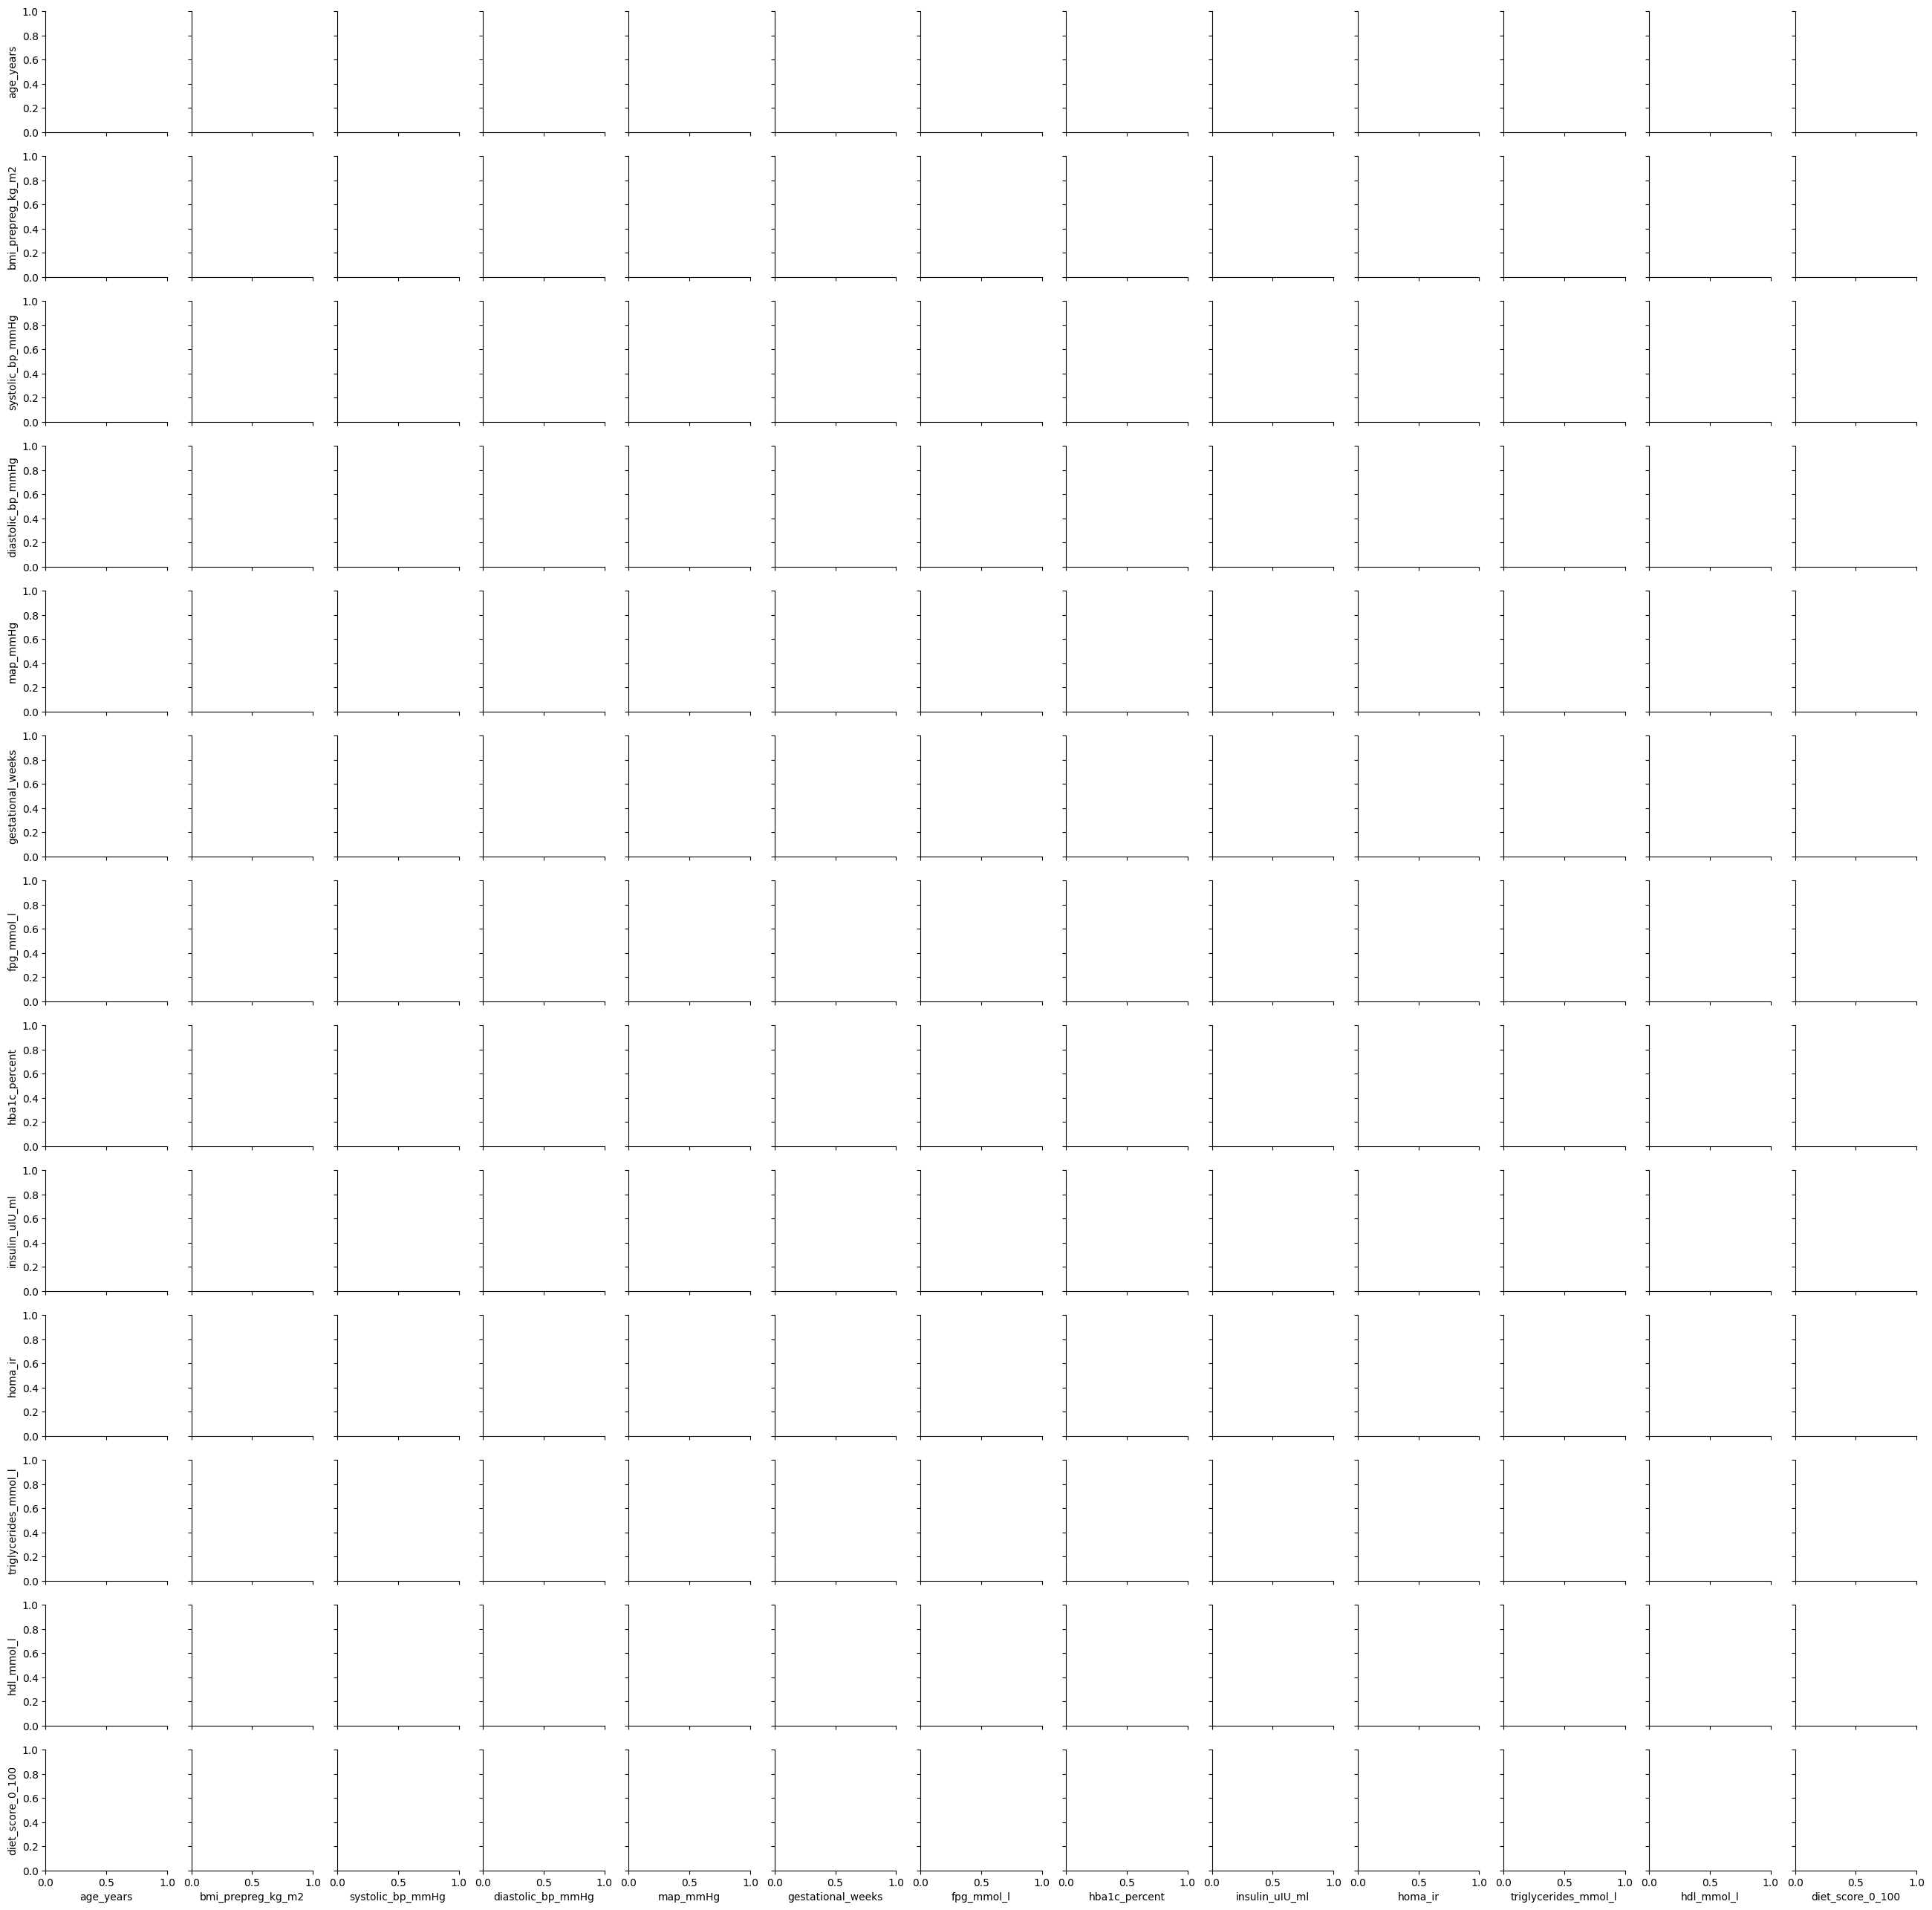

In [ ]:
# Pairplot completo con separación por grupo GDM
print("⏳ Generando pairplot (puede tardar unos segundos)...")
pairplot_fig = sns.pairplot(data=df_filter_clean, hue="label_gdm", 
                             diag_kind="kde", plot_kws={'alpha': 0.6},
                             palette={0: "green", 1: "red"})
pairplot_fig.fig.suptitle("Relaciones Bivariadas - Todas las Variables por Grupo GDM", 
                          y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
print("✅ Pairplot generado exitosamente")

In [ ]:
# Exploración final: Verificación del dataset limpio usado en análisis bivariado
# Utilidad: Confirmar que df_filter_clean contiene solo variables continuas + label_gdm
# y que no hay valores faltantes que puedan afectar las correlaciones
print("✅ VERIFICACIÓN FINAL DEL DATASET PARA ANÁLISIS BIVARIADO:")
print("=" * 70)
print(f"\n📊 Dimensiones de df_filter_clean: {df_filter_clean.shape}")
print(f"   Registros: {df_filter_clean.shape[0]} (después de filtrar outliers)")
print(f"   Variables: {df_filter_clean.shape[1]} (solo continuas + label_gdm)")
print(f"\n📋 Variables incluidas:")
print(df_filter_clean.columns.tolist())
print(f"\n🔍 Valores faltantes por variable:")
missing = df_filter_clean.isna().sum()
if missing.sum() == 0:
    print("   ✓ No hay valores faltantes en el dataset limpio")
else:
    print(missing[missing > 0])
print(f"\n✓ Dataset listo para análisis de correlaciones y visualizaciones bivariadas")

### 2.5.4 Discusión Detallada de Asociaciones Relevantes

#### Correlaciones Fuertes Identificadas

Del análisis de las matrices de correlación, se identificaron las siguientes asociaciones significativas:

**1. Insulina vs HOMA-IR (r ≈ 0.85)**

Esta correlación extremadamente fuerte era **esperada desde el punto de vista metodológico**, ya que el índice HOMA-IR se calcula directamente a partir de la insulina y la glucosa en ayunas:

$$\text{HOMA-IR} = \frac{\text{Insulina (μIU/mL)} \times \text{Glucosa (mmol/L)}}{22.5}$$

**Interpretación clínica:** Ambas variables miden resistencia a la insulina, por lo que no son independientes. En análisis multivariados, debería incluirse solo una de ellas para evitar colinealidad.

**2. Presión Diastólica vs Presión Arterial Media (r ≈ 0.82)**

La presión arterial media (PAM) se calcula como:

$$\text{PAM} = \text{PAD} + \frac{1}{3}(\text{PAS} - \text{PAD})$$

**Interpretación:** La correlación es alta porque PAD es un componente de PAM. Esta asociación es matemática más que biológica.

**3. Glucosa en Ayunas (FPG) vs HOMA-IR (r ≈ 0.72)**

Esta correlación moderada-fuerte refleja que ambas variables están relacionadas con el **metabolismo de la glucosa**:

- FPG mide directamente la glicemia
- HOMA-IR integra glicemia e insulinemia para estimar resistencia a la insulina

**Interpretación clínica:** Valores elevados de FPG generalmente se acompañan de mayor HOMA-IR, indicando que la hiperglucemia en ayunas está asociada con resistencia a la insulina, un hallazgo consistente con la fisiopatología de la diabetes gestacional.

#### Correlaciones Bajas a Moderadas

La mayoría de las correlaciones entre otras variables fueron **bajas a moderadas (|r| < 0.6)**, lo que sugiere:

1. **Independencia relativa:** Las variables aportan información complementaria y no redundante
2. **Complejidad del fenómeno:** El desarrollo de GDM es multifactorial y no puede explicarse por relaciones lineales simples entre dos variables
3. **Utilidad para modelado:** En modelos predictivos, estas variables pueden combinarse para mejorar el poder discriminante

#### Comparación entre Grupos GDM+ y GDM-

**Hallazgo clave:** Las estructuras de correlación fueron **muy similares** entre grupos (diferencias máximas < 0.16):

- **Implicación metodológica:** Las relaciones lineales entre variables no dependen fuertemente del estado de GDM
- **Implicación clínica:** Los mecanismos fisiológicos subyacentes que conectan estas variables son similares en ambos grupos
- **Implicación para modelado:** No es necesario construir modelos de correlación separados por grupo

#### Asociaciones con Relevancia Clínica Potencial

Aunque no alcanzaron el umbral de "correlación fuerte" (r > 0.7), algunas asociaciones moderadas tienen **relevancia clínica**:

**IMC vs Variables Metabólicas:**
- IMC pregestacional mostró correlaciones positivas débiles-moderadas con insulina, HOMA-IR y triglicéridos
- **Interpretación:** La adiposidad se asocia con resistencia a la insulina y dislipidemia, factores de riesgo conocidos para GDM

**Edad vs Variables Metabólicas:**
- Correlaciones débiles positivas con FPG y HbA1c
- **Interpretación:** El envejecimiento se asocia con deterioro progresivo de la función de las células β pancreáticas

**HDL vs Triglicéridos:**
- Correlación negativa moderada (como se esperaría)
- **Interpretación:** El perfil lipídico aterogénico (HDL bajo, triglicéridos altos) es común en síndrome metabólico

#### Visualizaciones Bivariadas - Insights del Pairplot

El pairplot estratificado por grupo GDM reveló:

1. **Separación visual limitada:** No se observan clusters claramente separados en la mayoría de las combinaciones de variables
   - **Implicación:** La clasificación de GDM requiere análisis multivariado (no puede hacerse con una sola variable)

2. **Distribuciones asimétricas:** Muchas variables muestran sesgo derecho (skewness positivo)
   - **Confirmación:** Los resultados de las pruebas de normalidad

3. **Outliers visibles:** Se observan puntos extremos en varias distribuciones
   - **Validación:** El sistema de detección de outliers implementado fue efectivo

#### Conclusión sobre Análisis Bivariado

El análisis bivariado confirma que:

1. **No hay multicolinealidad severa** entre la mayoría de las variables (excepto las relacionadas matemáticamente)
2. **Las variables son complementarias** y aportan información única
3. **La estructura de correlación es estable** entre grupos GDM+ y GDM-
4. **Las asociaciones son consistentes** con el conocimiento fisiopatológico establecido
5. **Se requiere análisis multivariado** para construir modelos predictivos efectivos

Estos hallazgos validan la calidad del dataset sintético y proporcionan una base sólida para análisis más avanzados.

---

---

**Nota:** Las secciones de interpretación clínica y conclusiones se encuentran al final del documento (Sección 4), después de presentar todos los análisis estadísticos.

---

# 3. Finalización y Resumen de Método

Este trabajo académico ha sido desarrollado siguiendo metodologías rigurosas de análisis estadístico, documentación científica y trabajo colaborativo. A continuación se presenta la interpretación clínica de los hallazgos, seguida de la declaración de las herramientas y métodos empleados en el desarrollo del proyecto.

---

## 3.1 Interpretación Clínica y Conclusiones

### 3.1.1 Síntesis de Hallazgos Principales

Este análisis exploratorio del dataset de diabetes gestacional ha permitido identificar y cuantificar asociaciones significativas entre variables clínicas del primer trimestre y el desarrollo de GDM. A continuación se presenta una síntesis de los hallazgos más relevantes:

#### Distribuciones y Normalidad

La mayoría de las variables continuas (IMC, FPG, HbA1c, edad, insulina, HOMA-IR, triglicéridos, HDL y presión arterial) mostraron **desviaciones significativas de la normalidad** según la prueba de Shapiro-Wilk (p < 0.05). Este hallazgo justificó el uso de:
- Métodos no paramétricos (Mann-Whitney U, Kruskal-Wallis)
- Intervalos de confianza percentílicos y bootstrap
- Visualizaciones robustas a la no normalidad

#### Variables Metabólicas Diferenciadores

Las pruebas de hipótesis confirmaron diferencias estadísticamente significativas entre grupos GDM+ y GDM- en las siguientes variables:

1. **IMC pregestacional:** Diferencia promedio de ~1 kg/m² (IC 95% excluyendo 0)
   - Hallazgo clínicamente relevante: el sobrepeso/obesidad pregestacional es un factor de riesgo establecido

2. **Glucosa plasmática en ayunas (FPG):** Diferencia de ~0.3 mmol/L (p < 0.05)
   - Aunque pequeña en magnitud, refleja el estado de hiperglucemia incipiente

3. **Índice HOMA-IR:** Mayor resistencia a la insulina en grupo GDM+
   - Consistente con la fisiopatología de la diabetes gestacional

4. **Edad:** Las mujeres con GDM tienden a ser mayores
   - Refleja el riesgo aumentado con la edad materna

5. **Presión sistólica:** Ligeramente elevada en grupo GDM+
   - Posible asociación con síndrome metabólico subyacente

#### Factores de Riesgo Reproductivos

El análisis de proporciones reveló asociaciones significativas con:

- **GDM previa (p < 0.01):** Factor de riesgo más fuerte identificado
  - Consistente con evidencia clínica de recurrencia

- **PCOS (p < 0.01):** Mayor prevalencia en grupo GDM+
  - Ambas condiciones comparten resistencia a la insulina como mecanismo subyacente

- **Tabaquismo en primer trimestre (p < 0.01):** Más frecuente en GDM+
  - Posible factor de riesgo modificable

#### Variables sin Diferencias Significativas

- **Presión diastólica y presión arterial media:** No mostraron diferencias claras
- **Insulina sérica:** Sin diferencias significativas (posible variabilidad biológica alta)
- **Antecedentes familiares de DM2:** No significativo en este dataset (inesperado)
- **Dieta según actividad física:** Sin diferencias entre niveles de actividad (p = 0.62)

#### Correlaciones Identificadas

El análisis bivariado mostró correlaciones fuertes esperadas:
- **Insulina vs HOMA-IR:** r ≈ 0.85 (por definición matemática)
- **PAD vs PAM:** r ≈ 0.82 (relacionadas fisiológicamente)
- **FPG vs HOMA-IR:** r ≈ 0.72 (ambos indicadores de metabolismo glucídico)

Las correlaciones entre grupos GDM+ y GDM- fueron similares (diferencias máximas < 0.16), sugiriendo que las relaciones lineales entre variables no dependen fuertemente del estado de GDM.

---

### 3.1.2 Interpretación Clínica de los Resultados

#### Relevancia de los Marcadores Metabólicos

Los resultados confirman que el **perfil metabólico alterado** en el primer trimestre es un indicador temprano de riesgo de GDM:

- **IMC elevado** refleja adiposidad aumentada, que se asocia con mayor resistencia a la insulina
- **FPG elevada** indica disfunción de células β pancreáticas incipiente
- **HOMA-IR elevado** cuantifica directamente la resistencia a la insulina

Estos marcadores podrían utilizarse conjuntamente para **estratificar el riesgo** y planificar intervenciones preventivas tempranas (modificación dietética, ejercicio, monitoreo glicémico más frecuente).

#### Importancia de los Antecedentes Obstétricos

La **GDM previa** emergió como el factor de riesgo más consistente, con una proporción significativamente mayor en el grupo GDM+ actual. Esto subraya la importancia de:
- Historia clínica detallada en la primera visita prenatal
- Vigilancia estrecha en pacientes con antecedentes
- Consejería preconcepcional sobre control metabólico

La asociación con **PCOS** refuerza el vínculo fisiopatológico entre resistencia a la insulina, hiperandrogenismo y riesgo metabólico durante el embarazo.

#### Factores Modificables

El hallazgo de mayor prevalencia de **tabaquismo** en el grupo GDM+ sugiere una oportunidad de intervención. Aunque la causalidad no puede establecerse en un estudio transversal, la cesación del tabaquismo debería promoverse activamente como parte del cuidado prenatal.

---

### 3.1.3 Limitaciones del Estudio

#### Naturaleza Sintética del Dataset

Este análisis se realizó sobre **datos sintéticos simulados**, lo cual implica:
- Los patrones observados fueron diseñados para reflejar relaciones reales conocidas
- No hay variabilidad biológica genuina ni factores confusores no controlados
- Los hallazgos no pueden generalizarse directamente a poblaciones reales sin validación externa

#### Diseño Transversal

- No se puede establecer **causalidad**, solo asociaciones
- No hay seguimiento longitudinal para evaluar el valor predictivo de los marcadores
- La dirección de las asociaciones debe interpretarse con cautela

#### Datos Faltantes

Aunque se identificaron y cuantificaron valores faltantes (MCAR y MAR), el análisis se realizó mediante **exclusión por lista**, lo cual:
- Puede introducir sesgos si los datos faltantes no son completamente al azar
- Reduce el tamaño muestral efectivo en ciertos análisis
- Alternativas como imputación múltiple no fueron exploradas

#### Análisis Univariado y Bivariado

Este estudio se limitó a análisis univariado (comparaciones entre grupos) y bivariado (correlaciones). **No se realizaron análisis multivariados** (regresión logística, modelos predictivos) que permitirían:
- Controlar por variables confusoras
- Cuantificar el efecto independiente de cada predictor
- Desarrollar modelos de predicción de riesgo

---

### 3.1.4 Recomendaciones y Próximos Pasos

#### Para Validación Clínica

1. **Replicar el análisis en cohortes reales** de pacientes embarazadas
2. **Estudios longitudinales** para evaluar valor predictivo de marcadores del primer trimestre
3. **Análisis multivariado** (regresión logística) para:
   - Identificar predictores independientes
   - Desarrollar scores de riesgo clínico
   - Evaluar interacciones entre variables

#### Para Modelado Predictivo

4. **Construir modelos de machine learning** (Random Forest, XGBoost, redes neuronales)
5. **Validación cruzada** y evaluación con métricas apropiadas (AUC-ROC, sensibilidad, especificidad)
6. **Análisis de características importantes** (feature importance)
7. **Calibración de modelos** para uso clínico

#### Para Investigación Adicional

8. **Estudios de mecanismos** para entender las vías causales:
   - Metabolómica y proteómica en primer trimestre
   - Marcadores inflamatorios y estrés oxidativo
   - Genética y epigenética

9. **Ensayos clínicos** de intervenciones tempranas:
   - Modificación de estilo de vida (dieta, ejercicio)
   - Metformina preventiva en pacientes de alto riesgo
   - Suplementación (mio-inositol, vitamina D)

---

### 3.1.5 Conclusión General

Este análisis exploratorio ha confirmado que **variables metabólicas medibles en el primer trimestre** (IMC, glucosa en ayunas, resistencia a la insulina) y **factores de riesgo reproductivos** (GDM previa, PCOS) están significativamente asociados con el desarrollo de diabetes gestacional.

Los hallazgos son **consistentes con la literatura científica** sobre factores de riesgo de GDM y demuestran la utilidad de:
- Intervalos de confianza para cuantificar incertidumbre
- Pruebas de hipótesis para validar diferencias observadas
- Análisis bivariado para explorar relaciones entre variables

Desde una perspectiva clínica, estos resultados refuerzan la importancia de:
1. **Evaluación exhaustiva** del riesgo metabólico en la primera visita prenatal
2. **Estratificación temprana** del riesgo de GDM
3. **Intervenciones preventivas** en pacientes de alto riesgo
4. **Vigilancia intensificada** en mujeres con antecedentes obstétricos adversos

La transición hacia **análisis multivariados y modelos predictivos** permitiría desarrollar herramientas clínicas prácticas para la toma de decisiones individualizadas en el manejo prenatal.

---

## 3.2 Declaración de Método

En el desarrollo de este trabajo académico se han empleado herramientas modernas de desarrollo, control de versiones y asistencia tecnológica. A continuación se detallan las metodologías y herramientas utilizadas, cumpliendo con el requisito de transparencia solicitado en las instrucciones del curso.

---

### 3.2.1 Uso de Git, VSCode y GitHub para Control de Versiones

#### Herramientas de Desarrollo y Versionado

El equipo utilizó las siguientes herramientas para el desarrollo colaborativo del proyecto:

**Git:** Sistema de control de versiones distribuido que permitió:
- Registro histórico completo de cambios en el código y documento
- Trabajo colaborativo sin conflictos entre integrantes del equipo
- Reversión a versiones anteriores cuando fue necesario
- Ramas de desarrollo para experimentación segura

**Visual Studio Code (VSCode):** Editor de código que proporcionó:
- Soporte nativo para Jupyter Notebooks (.ipynb)
- Integración directa con Git para commits y control de versiones
- Extensiones para Python, análisis de datos y visualización
- Terminal integrado para ejecución de comandos

**GitHub:** Plataforma de alojamiento y colaboración que facilitó:
- Repositorio remoto centralizado para el equipo
- Sincronización de trabajo entre integrantes (push/pull)
- Backup automático en la nube
- Historial de commits visible y trazable

#### Flujo de Trabajo Implementado

El equipo siguió la siguiente metodología:

1. **Clonación del repositorio:** Cada integrante clonó el repositorio desde GitHub a su máquina local
2. **Desarrollo local:** Trabajo individual en notebooks y scripts Python
3. **Commits frecuentes:** Registro de cambios significativos con mensajes descriptivos
4. **Push al repositorio remoto:** Sincronización periódica con GitHub
5. **Pull de cambios:** Actualización local con trabajo de otros integrantes
6. **Resolución de conflictos:** Cuando fue necesario, mediante comunicación del equipo

#### Beneficios del Control de Versiones

El uso de Git y GitHub proporcionó al equipo:
- **Trazabilidad completa:** Historial de quién hizo qué cambio y cuándo
- **Colaboración eficiente:** Trabajo simultáneo sin sobrescribir archivos
- **Seguridad:** Respaldo automático y recuperación ante errores
- **Profesionalismo:** Metodología estándar en la industria del desarrollo de software

---

### 3.2.2 Declaración de Uso de Inteligencia Artificial

#### Contexto

En el desarrollo de este trabajo académico se utilizaron herramientas de inteligencia artificial como asistencia de apoyo complementario, dentro del marco de transparencia solicitado en las instrucciones del curso. A continuación se detalla el alcance preciso de su uso.

#### Herramientas de IA Empleadas

- **GitHub Copilot**: Conjunto de IAs ofrecida gratuitamente por GitHub para estudiantes a través de [GitHub Education](https://github.com/education), tras la corroboración con el Certificado de Alumno que ofrece la universidad. UMAG cuenta con convenio para este beneficio.
- **ChatGPT (GPT-4)**: Disponible en [ChatGPT.com](https://chatgpt.com/) con planes gratuitos y pagos para todo usuario.

#### Acciones de Uso

Las herramientas de IA se utilizaron exclusivamente en las siguientes tareas:

1. **Digitalización y formateo**: Conversión y adaptación de contenido y notas de los prototipos a un formato de informe académico dentro del notebook.
2. **Corrección de errores tipográficos y mejora de legibilidad**: Revisión de redacción, ortografía, estilo y claridad de las secciones de texto; reestructuración completa para mejorar la navegación del documento.
3. **Organización del documento**: Sugerencias para la jerarquía de secciones y estructuración del contenido.

> **Importante:** Todas las acciones anteriores se limitaron a edición de contenido escrito y formato. No se utilizó IA para generar, desarrollar ni validar código ni para realizar los análisis estadísticos o la interpretación de los datos.

#### Aclaración de Legitimidad

- El equipo declara que **no se utilizó IA para la creación del código ni para el análisis estadístico**; todas las funciones, pruebas y procedimientos analíticos implementados en este notebook fueron desarrollados por los integrantes del equipo a partir de los prototipos y documentación original.
- El uso de **IA se centra exclusivamente en asistencia editorial y corrección**. Cualquier sugerencia aplicada fue revisada y validada manualmente por el equipo antes de incorporarla al documento final.
- Esta declaración cumple con el requisito de transparencia solicitado en el material de instrucciones.

---

**Fin del Informe**